# Exploring travel trends on the Transport for London network 🚉

Welcome to my analysis of the average monthly temperatures on Transport for London's (TfL) tube & train network! 
This project aims to examine the patterns of travel on the Transport for London (TfL) network using [TfL open access data](http://crowding.data.tfl.gov.uk/) from 2007 to 2021. 

We'll be taking a closer look at how commuter figures across the TfL network changes over the years and what factors may be behind these trends 📈. By examining these trends, we can get an idea of which areas are under-served and make further inferences.

With that said, let's get started!

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import folium
import hvplot
from shapely.geometry import Point
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Preprocessing 🛠️

In this first section we will work on preprocessing. This involves cleaning ✨, transforming 🔀, and organizing 📂 our data to make it more suitable for analysis.

Don't worry, if you're not into that kind of stuff, no worries! You can collapse this section with a click of a button 🤏 and move on to the next. But if you stick around, you might learn some cool things!

So if you're ready for some data magic 🔮, feel free to expand this section and learn more about the specifics of preprocessing in my project!

### Loading TFL Station ridership data

#### Loading in 2007 to 2016 Entry / Exit data

In [163]:
file_name='data/TFL Station Counts/Annual_Counts/multi-year-station-entry-and-exit-figures.xlsx'

sheet07='2007 Entry & Exit'
df2007=pd.read_excel(io=file_name, sheet_name=sheet07, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet08='2008 Entry & Exit'
df2008=pd.read_excel(io=file_name, sheet_name=sheet08, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet09='2009 Entry & Exit'
df2009=pd.read_excel(io=file_name, sheet_name=sheet09, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet10='2010 Entry & Exit'
df2010=pd.read_excel(io=file_name, sheet_name=sheet10, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet11='2011 Entry & Exit'
df2011=pd.read_excel(io=file_name, sheet_name=sheet11, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet12='2012 Entry & Exit'
df2012=pd.read_excel(io=file_name, sheet_name=sheet12, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet13='2013 Entry & Exit'
df2013=pd.read_excel(io=file_name, sheet_name=sheet13, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet14='2014 Entry & Exit'
df2014=pd.read_excel(io=file_name, sheet_name=sheet14, skiprows=6).drop(columns=[
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])

sheet15='2015 Entry & Exit'
df2015=pd.read_excel(io=file_name, sheet_name=sheet15, skiprows=6).drop(columns=[  
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
sheet16='2016 Entry & Exit'
df2016=pd.read_excel(io=file_name, sheet_name=sheet16, skiprows=6).drop(columns=[ 
                                                                        'Weekday', 
                                                                        'Saturday', 
                                                                        'Sunday', 
                                                                        'Weekday.1', 
                                                                        'Saturday.1', 
                                                                        'Sunday.1'])
df2011.sample(5)

nlc                              Station Note    million
134  630  Latimer Road                               1.702701
56   555  Dagenham East                              2.222392
202  708  South Kensington                          30.608404
265  599  Wood Lane                                  3.437870
161  660  Northwick Park                             3.577980

#### Loading in 2017 Entry / Exit data

In [164]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2017.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017=df2017.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'Unnamed: 7',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'Unnamed: 11']).round()
df2017.sample(5)

Mode   NLC   ASC                 Station              Coverage    Source  \
156   LU   789  NOGu         North Greenwich  Station entry / exit    Relate   
228   LU   730  TOTu  Totteridge & Whetstone  Station entry / exit    Relate   
268   LO  1404  ACCr           Acton Central  Station entry / exit  Gateline   
26    LU   527  BGRu            Bounds Green  Station entry / exit    Relate   
109   LU   604  HIGu                Highgate  Station entry / exit    Relate   

          en/ex  
156  26585096.0  
228   2416108.0  
268   1990116.0  
26    6057231.0  
109   5581536.0

In [165]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2017.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2017hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2017hr=df2017hr.iloc[:,0:15]
df2017hr.sample(5)

Mode   NLC   ASC          Station              Coverage  year  day  \
2139       LO  7404  STOr  South Tottenham  Station entry / exit  2017  SUN   
1538       LU   702  SSQu    Sloane Square  Station entry / exit  2017  SUN   
302        LU   535  CTNu      Camden Town  Station entry / exit  2017  MTF   
0          LU   500  ACTu       Acton Town  Station entry / exit  2017  MTF   
2626  TfLRail  6881  IFDr           Ilford  Station entry / exit  2017  SUN   

      dir  Total  Early       AM Peak  Inter Peak  PM Peak  Evening     \
2139   IN   1610           5       98         612      572         262   
1538  OUT  12148          12     1233        7123     2451        1014   
302   OUT  31183         570     7222       10908     6687        3840   
0      IN   9531         608     3287        2705     2029         655   
2626  OUT   3159          14      200        1165      971         588   

      Late        
2139          61  
1538         315  
302         1956  
0            247  
2626         221

#### Loading in 2018 Entry / Exit data


In [166]:
#Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2018.xlsx'
sheet =  'Annualised'
#Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018=df2018.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2018.sample(5)

Mode   NLC   ASC           Station                 Coverage     Source  \
270   LO   514  BKGu           Barking  LO boarding / alighting  Loadweigh   
9     LU   511  BSTu      Baker Street     Station entry / exit   Gateline   
356   LO   717  SPKu  Stonebridge Park     Station entry / exit     Scaled   
22    LU   522  BHRu   Blackhorse Road     Station entry / exit   Gateline   
298   LO  6959  ENFr      Enfield Town     Station entry / exit   Gateline   

          en/ex  
270   3088767.0  
9    27349471.0  
356    754933.0  
22    9058828.0  
298   2441874.0

In [167]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2018 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2018.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2018hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2018hr=df2018hr.iloc[:,0:15]
df2018hr.sample(5)

Mode   NLC   ASC           Station              Coverage  year  day  dir  \
503    LU   738   UPY             Upney  Station entry / exit  2018  MTT  OUT   
2712   LO  1438  BSPr  Brondesbury Park  Station entry / exit  2018  SAT  OUT   
1413   LU   542   EMB        Embankment  Station entry / exit  2018  SAT  OUT   
18     LU   519   BPK      Belsize Park  Station entry / exit  2018  MTT   IN   
3204  DLR   888  PRRd     Prince Regent  Station entry / exit  2018  FRI  OUT   

      Total  Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
503    4251          67      506         837     1834         746         261  
2712   1156          14      174         410      284         172         102  
1413  24267         236     1666       12125     6043        2830        1367  
18    10457         220     2945        3254     2896         918         224  
3204   3626          63      482         866     1125         669         421

#### Loading in 2019 Entry / Exit data

In [168]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2017 
file_name =  'data/TFL Station Counts/Annual_Counts/AnnualisedEntryExit_2019.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019=df2019.drop(columns=['entries', 
                            'entries.1', 
                            'entries.2',
                            'entries.3',
                            'exits',
                            'exits.1',
                            'exits.2',
                            'exits.3']).round()
df2019.sample(5)

Mode   NLC   ASC         Station              Coverage    Source  \
147   LU   643  MHEu  Mill Hill East  Station entry / exit  Gateline   
29    LU   778  BRXu      Brixton LU  Station entry / exit  Gateline   
83    LU   582  GHLu      Gants Hill  Station entry / exit  Gateline   
380  DLR   750  ABRd      Abbey Road  Station entry / exit       APC   
277   LO  6958  BCVr     Bruce Grove  Station entry / exit    Scaled   

          en/ex  
147   1407857.0  
29   32032655.0  
83    6358482.0  
380   1219247.0  
277   1782467.0

In [169]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2019 
file_name =  'data/TFL Station Counts/Hourly_Counts/ByQhrEntryExit_2019.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2019hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2019hr=df2019hr.iloc[:,0:15]
df2019hr.sample(5)

Mode   NLC   ASC          Station                 Coverage  year  day  \
2201   LO   621  KEWu      Kew Gardens  LO boarding / alighting  2019  MTT   
1080   LU   510  ARLu          Arsenal     Station entry / exit  2019  SAT   
1873   LU   599  WDLu        Wood Lane     Station entry / exit  2019  SUN   
2382   LO  1440  CMDr      Camden Road     Station entry / exit  2019  FRI   
2227   LO  7404  STOr  South Tottenham     Station entry / exit  2019  MTT   

      dir  Total  Early       AM Peak  Inter Peak  PM Peak  Evening     \
2201   IN   2494          31      380         558      921         194   
1080   IN   3911          61      494        2023      773         365   
1873   IN   3480           9      185        1460     1324         391   
2382   IN   8118         134     1018        1982     3117        1269   
2227   IN   2121         120      545         543      638         210   

      Late        
2201         410  
1080         195  
1873         111  
2382         598  
2227          65

#### Loading in 2020 Entry / Exit data

In [170]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2020_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2020=df2020.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2020.sample(5)

Mode  NLC   ASC           Station              Coverage    Source  \
417   LU  654  NELu      North Ealing  Station entry / exit  Gateline   
57    LU  788  CWRu      Canada Water  Station entry / exit  Gateline   
229   LU  717  SPKu  Stonebridge Park  Station entry / exit  Gateline   
207   LU  609  HRDu     Holloway Road  Station entry / exit  Gateline   
224   LU  602  HBTu       High Barnet  Station entry / exit  Gateline   

         En/Ex  
417   507381.0  
57   6129616.0  
229  1982465.0  
207  2260557.0  
224  2028542.0

In [171]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2020 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2020_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2020hr = pd.read_excel(io=file_name, 
                         sheet_name=sheet,
                         skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2020hr = df2020hr.astype(convert_dict)
df2020hr=df2020hr.iloc[:,0:15]
df2020hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2020  MTT   IN   3702   
1   LU  502  ALDu       Aldgate  Station entry / exit  2020  MTT   IN   2489   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2020  MTT   IN   3198   
3   LU  505  ALPu      Alperton  Station entry / exit  2020  MTT   IN   2073   
4   LU  506  AMEu      Amersham  Station entry / exit  2020  MTT   IN    980   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         288     1101        1186      824         213          89  
1         173      520         622      920         208          46  
2         103      473        1064     1126         333          99  
3         360      668         506      409          99          31  
4         148      425         257      124          21           6

#### Loading in 2021 Entry / Exit data

In [172]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Annual_Counts/AC2021_AnnualisedEntryExit.xlsx'
sheet =  'Annualised'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021 = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6) 
df2021=df2021.drop(columns=['Entries', 
                            'Entries.1', 
                            'Entries.2', 
                            'Entries.3', 
                            'Exits', 
                            'Exits.1', 
                            'Exits.2', 
                            'Exits.3']).round()
df2021.sample(5)

Mode   NLC   ASC           Station                 Coverage        Source  \
119   LU   615  ICKu          Ickenham     Station entry / exit      Gateline   
357   LO  6934  SKWr   Stoke Newington     Station entry / exit  Manual Count   
372   LO  1402  WFJr  Watford Junction  LO boarding / alighting        Scaled   
36    LU   852  CWFu   Canary Wharf LU     Station entry / exit      Gateline   
50    LU   549  CPSu     Clapham South     Station entry / exit      Gateline   

          En/Ex  
119    480785.0  
357   1176525.0  
372   1135592.0  
36   18288802.0  
50    3758231.0

In [173]:
# Loading in TFL Station Exit & Entry Spreadsheet for 2021 
file_name =  'data/TFL Station Counts/Hourly_Counts/AC2021_ByQhrEntryExit.xlsx'
sheet =  'ByQhr'
# Some Rows are skipped and irrelevant columns are dropped to standardize the DataFrame
df2021hr = pd.read_excel(io=file_name, sheet_name=sheet, skiprows=6).round()
convert_dict = {'Total': np.int32, 
                'Early     ': np.int32, 
                'AM Peak': np.int32, 
                'Inter Peak': np.int32, 
                'PM Peak': np.int32, 
                'Evening   ': np.int32, 
                'Late      ': np.int32}
df2021hr = df2021hr.astype(convert_dict)
df2021hr=df2021hr.iloc[:,0:15]
df2021hr.head(5)

Mode  NLC   ASC       Station              Coverage  year  day  dir  Total  \
0   LU  500  ACTu    Acton Town  Station entry / exit  2021  MTT   IN   6851   
1   LU  502  ALDu       Aldgate  Station entry / exit  2021  MTT   IN   8038   
2   LU  503  ALEu  Aldgate East  Station entry / exit  2021  MTT   IN  12751   
3   LU  505  ALPu      Alperton  Station entry / exit  2021  MTT   IN   3109   
4   LU  506  AMEu      Amersham  Station entry / exit  2021  MTT   IN   2384   

   Early       AM Peak  Inter Peak  PM Peak  Evening     Late        
0         415     2195        2017     1617         439         169  
1         213     1235        1910     3310        1044         326  
2         202     1758        3842     4344        1851         753  
3         367     1067         823      606         199          47  
4         379     1050         574      311          51          19

###### In the Hourly DFs loaded in the categories are grouped into Early, AM Peak, Inter Peak,	PM Peak,	Evening, &	Late. These categories are specified as follows: 
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

In [174]:
# The DataDrames contain the Stations and their associated TFL mode. 
# Some stations contain multiple train modes however, so only 'unique' instances are called

print('2007', '-', '[LU]',
      df2007['Station'].nunique(),'stations') 

print('2008', '-', '[LU]', 
      df2008['Station'].nunique(),'stations') # East London Line decomissioned and joins London Overground

print('2009', '-', '[LU]',
      df2009['Station'].nunique(),'stations')

print('2010', '-', '[LU]',
      df2010['Station'].nunique(),'stations')

print('2011', '-', '[LU]',
      df2011['Station'].nunique(),'stations')

print('2012', '-', '[LU]',
      df2012['Station'].nunique(),'stations')

print('2013', '-', '[LU]',
      df2013['Station'].nunique(),'stations')

print('2014', '-', '[LU]',
      df2014['Station'].nunique(),'stations')

print('2015', '-', '[LU]',
      df2015['Station'].nunique(),'stations')

print('2016', '-', '[LU]',
      df2016['Station'].nunique(),'stations')

print('2017', '-',
      df2017['Mode'].unique(), 
      df2017['Station'].nunique(),'stations') # Data provided in prior DFs is only for London Underground
print('2018', '-',
      df2018['Mode'].unique(), 
      df2018['Station'].nunique(),'stations') # Stations opened on the TFLRail West route
print('2019', '-',
      df2019['Mode'].unique(), 
      df2019['Station'].nunique(),'stations') 
print('2020', '-',
      df2020['Mode'].unique(), 
      df2020['Station'].nunique(),'stations') # More Stations opened on the TFLRail West route
                                              # TFLRail is rebranded as the Elizabeth Line(EZL) upon completion
print('2021', '-',
      df2021['Mode'].unique(), 
      df2021['Station'].nunique(),'stations') # Nine Elms and Battersea Power Station added to the Northern Line

2007 - [LU] 273 stations
2008 - [LU] 268 stations
2009 - [LU] 268 stations
2010 - [LU] 268 stations
2011 - [LU] 268 stations
2012 - [LU] 268 stations
2013 - [LU] 268 stations
2014 - [LU] 268 stations
2015 - [LU] 268 stations
2016 - [LU] 268 stations
2017 - ['LU' 'LO' 'DLR' 'TfLRail'] 408 stations
2018 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2019 - ['LU' 'LO' 'DLR' 'TfLRail'] 416 stations
2020 - ['LU' 'DLR' 'LO' 'EZL'] 426 stations
2021 - ['LU' 'LO' 'DLR' 'EZL'] 428 stations


In [175]:
# Creating dfs with only London Underground data
df2017LU=df2017[df2017['Mode']=='LU']
df2018LU=df2018[df2018['Mode']=='LU']
df2019LU=df2019[df2019['Mode']=='LU']
df2020LU=df2020[df2020['Mode']=='LU']
df2021LU=df2021[df2021['Mode']=='LU']

In [176]:
pd.set_option('display.max_columns', None)

In [177]:
# For some reason, some of the column names have white space, as shown below. 
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', ' day', ' dir',
       'Total', 'Early     ', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening   ',
       'Late      '],
      dtype='object')


In [178]:
# To correct this, the columns are stripped of whitespace
df2017hr.columns=df2017hr.keys().str.strip()
df2018hr.columns=df2018hr.keys().str.strip()
df2019hr.columns=df2019hr.keys().str.strip()
df2020hr.columns=df2020hr.keys().str.strip()
df2021hr.columns=df2021hr.keys().str.strip()
print(df2017hr.keys())
print(df2018hr.keys())
print(df2019hr.keys())
print(df2020hr.keys())
print(df2021hr.keys())

Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')
Index(['Mode', 'NLC', 'ASC', 'Station', 'Coverage', 'year', 'day', 'dir',
       'Total', 'Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening',
       'Late'],
      dtype='object')


### Slicing the data by Days of the week 

#### Slicing 2017 Entry / Exit data

In [179]:
df2017hr=df2017hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].sum()
print(df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[2:])

Total         11601418
Early           410606
AM Peak        3050039
Inter Peak     2880265
PM Peak        3183198
Evening        1439332
Late            637978
dtype: int64


#### Slicing 2018 Entry / Exit data

In [180]:
df2018hr=df2018hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11602754
Early           426922
AM Peak        3049475
Inter Peak     2920222
PM Peak        3194781
Evening        1430876
Late            580478
dtype: int64


#### Slicing 2019 Entry / Exit data

In [181]:
df2019hr=df2019hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         11777884
Early           422622
AM Peak        3100335
Inter Peak     2971552
PM Peak        3254342
Evening        1447731
Late            581302
dtype: int64


#### Slicing 2020 Entry / Exit data

In [182]:
df2020hr=df2020hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         2999545
Early          217860
AM Peak        779180
Inter Peak     829986
PM Peak        834653
Evening        266806
Late            71054
dtype: int64


#### Slicing 2021 Entry / Exit data

In [183]:
df2021hr=df2021hr.groupby(['year', 
                           'NLC', 
                           'day', 
                           'Station', 
                           'dir']).sum(numeric_only=True).reset_index()
df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].sum()
print(df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[2:])

Total         7349812
Early          301384
AM Peak       1744411
Inter Peak    1979360
PM Peak       2011992
Evening        893644
Late           419004
dtype: int64


In [184]:
df2017hr.head()

year  NLC  day     Station  dir  Total  Early  AM Peak  Inter Peak  \
0  2017  500  MTF  Acton Town   IN   9531    608     3287        2705   
1  2017  500  MTF  Acton Town  OUT   9382    265     1979        1762   
2  2017  500  SAT  Acton Town   IN   6716    256     1087        2978   
3  2017  500  SAT  Acton Town  OUT   6617    147      617        1901   
4  2017  500  SUN  Acton Town   IN   4744    155      747        2438   

   PM Peak  Evening  Late  
0     2029      655   247  
1     2664     1689  1023  
2     1281      713   401  
3     1465     1226  1261  
4      821      442   141

In [185]:
dfs = [df2017hr, df2018hr, df2019hr, df2020hr, df2021hr]

# concatenating
df_mergedhr = pd.concat(dfs, axis=0, ignore_index=True)

# check the resulting data frame
df_mergedhr.sample(5)

year   NLC  day               Station  dir  Total  Early  AM Peak  \
8553  2019  5150  FRI             New Cross  OUT   4299     80      552   
9498  2020   549  MTT         Clapham South   IN   3310    211     1076   
263   2017   543  SUN               Chesham  OUT    564      0       36   
425   2017   570  SUN  Elephant & Castle LU  OUT  15851      0      954   
4263  2018   737  SUN      Upminster Bridge  OUT    413      4       33   

      Inter Peak  PM Peak  Evening  Late  
8553        1055     1323      809   480  
9498        1017      754      203    50  
263          190      157      122    59  
425         5732     4469     3304  1392  
4263         137      122       77    40

### Grouping DFs and Standardizing formats

As the datasets have had their formats altered over the years, it is necessary for some formatting to ensure uniformity in our Dataframe.

The next cells will be doing just that to ensure we have just the data required for our analysis.

In [186]:
df_grouped2007=df2007.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2007['million']=df_grouped2007['million']*1_000_000
df_grouped2007.rename(columns={"nlc": "NLC",
                               "million": "En/Ex 2007"}, inplace=True)
df_grouped2007.head(3)

NLC                              Station  En/Ex 2007
0  500  Acton Town                            5773625.0
1  501  Barbican                              9558748.0
2  502  Aldgate                               5572412.0

In [187]:
df_grouped2008=df2008.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2008['million']=df_grouped2008['million']*1_000_000
df_grouped2008.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2008"}, inplace=True)
df_grouped2008.head(3)

NLC                              Station  En/Ex 2008
0  500.0  Acton Town                            5816798.0
1  501.0  Barbican                             10030975.0
2  502.0  Aldgate                               6243135.0

In [188]:
df_grouped2009=df2009.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2009['million']=df_grouped2009['million']*1_000_000
df_grouped2009.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2009"}, inplace=True)
df_grouped2009.head(3)

NLC                              Station  En/Ex 2009
0  500  Acton Town                            5459521.0
1  501  Barbican                              9261249.0
2  502  Aldgate                               5974176.0

In [189]:
df_grouped2010=df2010.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2010['million']=df_grouped2010['million']*1_000_000
df_grouped2010.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2010"}, inplace=True)
df_grouped2010.head(3)

NLC                              Station  En/Ex 2010
0  500  Acton Town                            5428316.0
1  501  Barbican                              8873092.0
2  502  Aldgate                               6026534.0

In [190]:
df_grouped2011=df2011.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2011['million']=df_grouped2011['million']*1_000_000
df_grouped2011.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2011"}, inplace=True)
df_grouped2011.head(3)

NLC                              Station  En/Ex 2011
0  500  Acton Town                            5462387.0
1  501  Barbican                              9228704.0
2  502  Aldgate                               6235513.0

In [191]:
df_grouped2012=df2012.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2012['million']=df_grouped2012['million']*1_000_000
df_grouped2012.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2012"}, inplace=True)
df_grouped2012.head(3)

NLC                              Station  En/Ex 2012
0  500  Acton Town                            5584934.0
1  501  Barbican                              9850562.0
2  502  Aldgate                               6647283.0

In [192]:
df_grouped2013=df2013.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2013['million']=df_grouped2013['million']*1_000_000
df_grouped2013.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2013"}, inplace=True)
df_grouped2013.head(3)

NLC                              Station  En/Ex 2013
0  500  Acton Town                            5748994.0
1  501  Barbican                             10464425.0
2  502  Aldgate                               6877712.0

In [193]:
df_grouped2014=df2014.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2014['million']=df_grouped2014['million']*1_000_000
df_grouped2014.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2014"}, inplace=True)
df_grouped2014.head(3)

NLC     Station  En/Ex 2014
0  500  Acton Town   6059017.0
1  501    Barbican  11444738.0
2  502     Aldgate   7221566.0

In [194]:
df_grouped2015=df2015.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2015['million']=df_grouped2015['million']*1_000_000
df_grouped2015.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2015"}, inplace=True)
df_grouped2015.head(3)

NLC                              Station  En/Ex 2015
0  500  Acton Town                            6235045.0
1  501  Barbican                             11283478.0
2  502  Aldgate                               7527810.0

In [195]:
df_grouped2016=df2016.groupby(['nlc', 'Station'], as_index=False).sum(numeric_only=True)
df_grouped2016['million']=df_grouped2016['million']*1_000_000
df_grouped2016.rename(columns={"nlc": "NLC", 
                               "million": "En/Ex 2016"}, inplace=True)
df_grouped2016.head(3)

NLC                              Station  En/Ex 2016
0  500  Acton Town                            6274649.0
1  501  Barbican                             11973122.0
2  502  Aldgate                               8009494.0

In [196]:
df_grouped2017LU=df2017LU.groupby(['NLC', 'Station'], as_index=False).sum('en/ex')
df_grouped2017LU.rename(columns={"en/ex": "En/Ex 2017"}, inplace=True)

df_grouped2017=df2017.groupby(['NLC', 'Station'], as_index=False).sum('en/ex')
df_grouped2017.rename(columns={"en/ex": "En/Ex 2017"}, inplace=True)
df_grouped2017.head(3)

NLC     Station  En/Ex 2017
0  500  Acton Town   5731527.0
1  501    Barbican  11303155.0
2  502     Aldgate   8459234.0

In [197]:
df_grouped2018LU=df2018LU.groupby(['NLC', 'Station'], as_index=False).sum('en/ex')
df_grouped2018LU.rename(columns={"en/ex": "En/Ex 2018"}, inplace=True)

df_grouped2018=df2018.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2018.rename(columns={"en/ex": "En/Ex 2018"}, inplace=True)
df_grouped2018.head(3)

NLC     Station  En/Ex 2018
0  500  Acton Town   5794685.0
1  501    Barbican  11160091.0
2  502     Aldgate   9218140.0

In [198]:
df_grouped2019LU=df2019LU.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2019LU.rename(columns={"en/ex": "En/Ex 2019"}, inplace=True)

df_grouped2019=df2019.groupby(['NLC','Station'], as_index=False).sum('en/ex')
df_grouped2019.rename(columns={"en/ex": "En/Ex 2019"}, inplace=True)
df_grouped2019.head(3)

NLC     Station  En/Ex 2019
0  500  Acton Town   6186555.0
1  501    Barbican  10467974.0
2  502     Aldgate   9956600.0

In [199]:
df_grouped2020LU=df2020LU.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2020LU.rename(columns={"En/Ex": "En/Ex 2020"}, inplace=True)

df_grouped2020=df2020.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2020.rename(columns={"En/Ex": "En/Ex 2020"}, inplace=True)
df_grouped2020.head(3)

NLC     Station  En/Ex 2020
0  500  Acton Town   3568528.0
1  501    Barbican   2537108.0
2  502     Aldgate   2775844.0

In [200]:
df_grouped2021LU=df2021LU.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2021LU.rename(columns={"En/Ex": "En/Ex 2021"}, inplace=True)

df_grouped2021=df2021.groupby(['NLC','Station'], as_index=False).sum('En/Ex')
df_grouped2021.rename(columns={"En/Ex": "En/Ex 2021"}, inplace=True)
df_grouped2021.head(3)

NLC     Station  En/Ex 2021
0  500  Acton Town   2902697.0
1  501    Barbican   3467856.0
2  502     Aldgate   3525128.0

Now that we have all our data formatted correctly, we can merge them all.

In [201]:
# Merging all the Datasets prior to 2017
pt1 = pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    pd.merge(
                        pd.merge(
                            pd.merge(
                                pd.merge(
                                    pd.merge(df_grouped2007,
                                             df_grouped2008.drop(columns=['Station']),
                                             on='NLC',
                                             how='outer'),
                                    df_grouped2009.drop(columns=['Station']),
                                    on='NLC',
                                    how='outer'),
                                df_grouped2010.drop(columns=['Station']),
                                on='NLC',
                                how='outer'),
                            df_grouped2011.drop(columns=['Station']),
                            on='NLC',
                            how='outer'),
                        df_grouped2012,
                        on='NLC',
                        how='outer'),
                    df_grouped2013.drop(columns=['Station']),
                    on='NLC',
                    how='outer'),
                df_grouped2014.drop(columns=['Station']),
                on='NLC',
                how='outer'),
            df_grouped2015.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2016.drop(columns=['Station']),
        on='NLC',
        how='outer')

In [202]:
# Merging all the Datasets post-2017.
pt2=pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(df_grouped2017.drop(columns=['Station']),
                     df_grouped2018.drop(columns=['Station']),
                     on='NLC',
                     how='outer'), 
            df_grouped2019.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2020.drop(columns=['Station']),
        on='NLC',
        how='outer'),
    df_grouped2021, # NLC is dropped in all other DFs to avoid duplicate columns
    on='NLC',
    how='outer')

In [203]:
# Merging all the Datasets post-2017.
pt3=pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(df_grouped2017LU.drop(columns=['Station']),
                     df_grouped2018LU.drop(columns=['Station']),
                     on='NLC',
                     how='outer'), 
            df_grouped2019LU.drop(columns=['Station']),
            on='NLC',
            how='outer'),
        df_grouped2020LU.drop(columns=['Station']),
        on='NLC',
        how='outer'),
    df_grouped2021LU, # NLC is dropped in all other DFs to avoid duplicate columns
    on='NLC',
    how='outer')

In [204]:
# Merging the two merged DFs
df_merged=pd.merge(pt1, 
                   pt2,
                   on='NLC', 
                   how='outer')

In [205]:
# Merging the two merged DFs
df_mergedLU=pd.merge(pt1, 
                     pt3,
                     on='NLC', 
                     how='outer')

In [206]:
df_mergedLU

NLC                            Station_x  En/Ex 2007  En/Ex 2008  \
0    500.0  Acton Town                            5773625.0   5816798.0   
1    501.0  Barbican                              9558748.0  10030975.0   
2    502.0  Aldgate                               5572412.0   6243135.0   
3    503.0  Aldgate East                          7657338.0   8152761.0   
4    505.0  Alperton                              3005522.0   3072270.0   
5    506.0  Amersham                              2341347.0   2171944.0   
6    507.0  Angel                                16625984.0  17824269.0   
7    508.0  Archway                               7738419.0   8236818.0   
8    509.0  Arnos Grove                           4314491.0   4250148.0   
9    510.0  Arsenal                               2734787.0   3212954.0   
10   511.0  Baker Street                         24009889.0  24605375.0   
11   512.0  Balham                               11336548.0  11560006.0   
12   513.0  Bank & Monument                      41882819.0  42823864.0   
13   514.0  Barking                              12787835.0  11676598.0   
14   515.0  Barkingside                            859251.0    952740.0   
15   516.0  Barons Court                          6698321.0   6778341.0   
16   517.0  Bayswater                             6042651.0   5982534.0   
17   518.0  Becontree                             2314840.0   2547549.0   
18   519.0  Belsize Park                          5632841.0   6144764.0   
19   520.0  Bethnal Green                        14095386.0  14272056.0   
20   521.0  Blackfriars                          12621265.0  13137897.0   
21   522.0  Blackhorse Road                       6178833.0   6093247.0   
22   524.0  Bond Street                          36695785.0  36406455.0   
23   525.0  Borough                               4138441.0   4140747.0   
24   526.0  Boston Manor                          1863704.0   1983961.0   
25   527.0  Bounds Green                          5497937.0   5777529.0   
26   528.0  Bow Road                              4590692.0   5315977.0   
27   529.0  Brent Cross                           1892404.0   2190859.0   
28   530.0  Bromley-by-Bow                        2652435.0   2745801.0   
29   531.0  Buckhurst Hill                        1548767.0   1597036.0   
30   532.0  Burnt Oak                             3173136.0   3513361.0   
31   534.0  Caledonian Road                       5333034.0   4932319.0   
32   535.0  Camden Town                          18777443.0  19643233.0   
33   536.0  Cannon Street                         4109347.0   4540496.0   
34   537.0  Canons Park                           1536223.0   1560563.0   
35   539.0  Chalfont & Latimer                    1307003.0   1190880.0   
36   540.0  Chalk Farm                            4651929.0   4853951.0   
37   541.0  Chancery Lane                        14770603.0  15385542.0   
38   542.0  Embankment                           19973153.0  20847113.0   
39   543.0  Chesham                                431532.0    449780.0   
40   544.0  Chigwell                               379676.0    406177.0   
41   545.0  Chiswick Park                         2222808.0   2047946.0   
42   546.0  Chorleywood                            998828.0    863869.0   
43   547.0  Clapham Common                        8770323.0   9049110.0   
44   548.0  Clapham North                         5710997.0   5849119.0   
45   549.0  Clapham South                         7379611.0   7599107.0   
46   550.0  Cockfosters                           1632508.0   1764804.0   
47   551.0  Colindale                             3790294.0   4100077.0   
48   552.0  Colliers Wood                         5236159.0   5481712.0   
49   553.0  Covent Garden                        12742497.0  17512618.0   
50   554.0  Croxley                                729529.0    749237.0   
51   555.0  Dagenham East                         2091664.0   2144847.0   
52   556.0  Dagenham Heathway   

In [207]:
# We would like to have the NLC column at the front of the DF, we append it to the front using this
df_mergedLU = df_mergedLU[['Station_x'] + [x for x in df_mergedLU.columns if x != 'Station_x']]
df_mergedLU = df_mergedLU[['Station_y'] + [x for x in df_mergedLU.columns if x != 'Station_y']]
df_mergedLU = df_mergedLU[['Station'] + [x for x in df_mergedLU.columns if x != 'Station']]
df_mergedLU = df_mergedLU[['NLC'] + [x for x in df_mergedLU.columns if x != 'NLC']]
df_mergedLU.rename(columns={'Station_x': 'Station 2007',
                          'Station_y': 'Station 2012',
                          'Station': 'Station 2021'}, inplace=True, errors='raise')
df_mergedLU['Station 2007'] = df_mergedLU['Station 2007'].str.strip()
df_mergedLU['Station 2012'] = df_mergedLU['Station 2012'].str.strip()
df_mergedLU

NLC               Station 2021              Station 2012  \
0    500.0                 Acton Town                Acton Town   
1    501.0                   Barbican                  Barbican   
2    502.0                    Aldgate                   Aldgate   
3    503.0               Aldgate East              Aldgate East   
4    505.0                   Alperton                  Alperton   
5    506.0                   Amersham                  Amersham   
6    507.0                      Angel                     Angel   
7    508.0                    Archway                   Archway   
8    509.0                Arnos Grove               Arnos Grove   
9    510.0                    Arsenal                   Arsenal   
10   511.0               Baker Street              Baker Street   
11   512.0                  Balham LU                    Balham   
12   513.0          Bank and Monument           Bank & Monument   
13   514.0                    Barking                   Barking   
14   515.0                Barkingside               Barkingside   
15   516.0               Barons Court              Barons Court   
16   517.0                  Bayswater                 Bayswater   
17   518.0                  Becontree                 Becontree   
18   519.0               Belsize Park              Belsize Park   
19   520.0           Bethnal Green LU             Bethnal Green   
20   521.0             Blackfriars LU               Blackfriars   
21   522.0            Blackhorse Road           Blackhorse Road   
22   524.0                Bond Street               Bond Street   
23   525.0                    Borough                   Borough   
24   526.0               Boston Manor              Boston Manor   
25   527.0               Bounds Green              Bounds Green   
26   528.0                   Bow Road                  Bow Road   
27   529.0                Brent Cross               Brent Cross   
28   530.0             Bromley-by-Bow            Bromley-by-Bow   
29   531.0             Buckhurst Hill            Buckhurst Hill   
30   532.0                  Burnt Oak                 Burnt Oak   
31   534.0            Caledonian Road           Caledonian Road   
32   535.0                Camden Town               Camden Town   
33   536.0           Cannon Street LU             Cannon Street   
34   537.0                Canons Park               Canons Park   
35   539.0         Chalfont & Latimer        Chalfont & Latimer   
36   540.0                 Chalk Farm                Chalk Farm   
37   541.0              Chancery Lane             Chancery Lane   
38   542.0                 Embankment                Embankment   
39   543.0                    Chesham                   Chesham   
40   544.0                   Chigwell                  Chigwell   
41   545.0              Chiswick Park             Chiswick Park   
42   546.0                Chorleywood               Chorleywood   
43   547.0             Clapham Common            Clapham Common   
44   548.0              Clapham North             Clapham North   
45   549.0              Clapham South             Clapham South   
46   550.0                Cockfosters               Cockfosters   
47   551.0                  Colindale                 Colindale   
48   552.0              Colliers Wood             Colliers Wood   
49   553.0              Covent Garden             Covent Garden   
50   554.0                    Croxley                   Croxley   
51   555.0              Dagenham East             Dagenham East   
52   556.0          Dagenham Heathway         Dagenham Heathway   
53   557.0                     Debden                    Debden   
54   558.0                Dollis Hill               Dollis Hill   
55   560.0            Ealing Broadway           Ealing Broadway   
56   561.0              Ealing Common             Ealing Common   
57   562.0               Earl's Court              Earl's Court   
58   563.0                 East Acton                E

In [208]:
# We would like to have the NLC column at the front of the DF, we append it to the front using this
df_merged = df_merged[['Station_x'] + [x for x in df_merged.columns if x != 'Station_x']]
df_merged = df_merged[['Station_y'] + [x for x in df_merged.columns if x != 'Station_y']]
df_merged = df_merged[['Station'] + [x for x in df_merged.columns if x != 'Station']]
df_merged = df_merged[['NLC'] + [x for x in df_merged.columns if x != 'NLC']]
df_merged.rename(columns={'Station_x': 'Station 2007',
                          'Station_y': 'Station 2012',
                          'Station': 'Station 2021'}, inplace=True, errors='raise')
df_merged['Station 2007']=df_merged['Station 2007'].str.strip()
df_merged['Station 2012']=df_merged['Station 2012'].str.strip()
df_merged.head(5)

NLC  Station 2021  Station 2012  Station 2007  En/Ex 2007  En/Ex 2008  \
0  500.0    Acton Town    Acton Town    Acton Town   5773625.0   5816798.0   
1  501.0      Barbican      Barbican      Barbican   9558748.0  10030975.0   
2  502.0       Aldgate       Aldgate       Aldgate   5572412.0   6243135.0   
3  503.0  Aldgate East  Aldgate East  Aldgate East   7657338.0   8152761.0   
4  505.0      Alperton      Alperton      Alperton   3005522.0   3072270.0   

   En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  \
0   5459521.0   5428316.0   5462387.0   5584934.0   5748994.0   6059017.0   
1   9261249.0   8873092.0   9228704.0   9850562.0  10464425.0  11444738.0   
2   5974176.0   6026534.0   6235513.0   6647283.0   6877712.0   7221566.0   
3   9047885.0   8974956.0   9157483.0  10134021.0  11663144.0  12248009.0   
4   3044399.0   2942987.0   2945259.0   2893236.0   2956888.0   3171235.0   

   En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  \
0   6235045.0   6274649.0   5731527.0   5794685.0   6186555.0   3568528.0   
1  11283478.0  11973122.0  11303155.0  11160091.0  10467974.0   2537108.0   
2   7527810.0   8009494.0   8459234.0   9218140.0   9956600.0   2775844.0   
3  12839311.0  13434630.0  13262408.0  13707738.0  14148654.0   3144899.0   
4   3205455.0   3174845.0   2896391.0   2796159.0   2858439.0   2064990.0   

   En/Ex 2021  
0   2902697.0  
1   3467856.0  
2   3525128.0  
3   5611130.0  
4   1345253.0

In merging these datasets, we notice that many values are not present in the Station name columns. A few NaN values shown below are present in the 'Station 2021' column.

In [209]:
df_mergedLU[df_mergedLU['Station 2012'].isnull()]

NLC             Station 2021 Station 2012    Station 2007  En/Ex 2007  \
142  651.0                      NaN          NaN       New Cross   2272307.0   
143  652.0                      NaN          NaN  New Cross Gate   3563251.0   
178  689.0                      NaN          NaN     Rotherhithe   1293908.0   
188  699.0                      NaN          NaN        Shadwell   1787127.0   
190  701.0                      NaN          NaN      Shoreditch         0.0   
211  722.0                      NaN          NaN    Surrey Quays   2455871.0   
232  744.0                      NaN          NaN         Wapping   1560851.0   
275  831.0                Nine Elms          NaN             NaN         NaN   
276  832.0  Battersea Power Station          NaN             NaN         NaN   

     En/Ex 2008  En/Ex 2009  En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   
275         NaN         NaN         NaN         NaN         NaN         NaN   
276         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2014  En/Ex 2015  En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
178         NaN         NaN         NaN         NaN         NaN         NaN   
188         NaN         NaN         NaN         NaN         NaN         NaN   
190         NaN         NaN         NaN         NaN         NaN         NaN   
211         NaN         NaN         NaN         NaN         NaN         NaN   
232         NaN         NaN         NaN         NaN         NaN         NaN   
275         NaN         NaN         NaN         NaN         NaN         NaN   
276         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2020  En/Ex 2021  
142         NaN         NaN  
143         NaN         NaN  
178         NaN         NaN  
188         NaN         NaN  
190         NaN         NaN  
211         NaN         NaN  
232         NaN         NaN  
275         NaN   1163116.0  
276         NaN   2177911.0

##### Notes:
As the East London Line was absorbed to the London Overground East section, the following amendments were made:
* *New Cross, New Cross Gate, Rotherhithe, Shadwell, Surrey Quays, and Wapping* station was closed from 2007 to 2010 and converted to the London Overground
* *Shoreditch* station was permanently closed after June 2006 and was later replaced by *Shoreditch High Street* station 

These were all part of the [transfer of Silverlink's Metro lines to Transport for London](https://www.ealingtimes.co.uk/news/1782035.tfl-to-take-on-rail-network/) under the London Overground banner.

In [210]:
df_merged.at[142,'Station 2021'] = 'New Cross'
df_merged.at[143,'Station 2021'] = 'New Cross Gate'
df_merged.at[178,'Station 2021'] = 'Rotherhithe'
df_merged.at[188,'Station 2021'] = 'Shadwell'
df_merged.at[190,'Station 2021'] = 'Shoreditch' 
df_merged.at[211,'Station 2021'] = 'Surrey Quays'
df_merged.at[232,'Station 2021'] = 'Wapping'

df_mergedLU.at[142,'Station 2012'] = 'New Cross'
df_mergedLU.at[143,'Station 2012'] = 'New Cross Gate'
df_mergedLU.at[178,'Station 2012'] = 'Rotherhithe'
df_mergedLU.at[188,'Station 2012'] = 'Shadwell'
df_mergedLU.at[190,'Station 2012'] = 'Shoreditch' 
df_mergedLU.at[211,'Station 2012'] = 'Surrey Quays'
df_mergedLU.at[232,'Station 2012'] = 'Wapping'
df_mergedLU.at[275,'Station 2012'] = 'Nine Elms'
df_mergedLU.at[276,'Station 2012'] = 'Battersea Power Station'

##### Note:
All these stations from the East London line were either permanently closed or underwent considerable reconstruction and became part of the London Overground under a new NLC.

For example, we can look at New Cross & New Cross Gate:

In [211]:
# define value to search for
str_pattern = 'New Cross'

# row by row check for the string pattern in the row values
filt = (df_merged
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_merged.drop(columns=['Station 2007', 'Station 2012'])[filt]

NLC    Station 2021  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
142   651.0       New Cross   2272307.0         NaN         NaN         NaN   
143   652.0  New Cross Gate   3563251.0         NaN         NaN         NaN   
348  5150.0       New Cross         NaN         NaN         NaN         NaN   
350  5345.0  New Cross Gate         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
142         NaN         NaN         NaN         NaN         NaN         NaN   
143         NaN         NaN         NaN         NaN         NaN         NaN   
348         NaN         NaN         NaN         NaN         NaN         NaN   
350         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  
142         NaN         NaN         NaN         NaN         NaN  
143         NaN         NaN         NaN         NaN         NaN  
348   2784006.0   2660707.0   2655302.0   1492538.0   1532792.0  
350   6886621.0   5850998.0   5606001.0   2076254.0   2724966.0

We can now drop the other station name columns since we no longer need them.

In [212]:
df_merged.drop(columns=['Station 2007', 'Station 2012'], inplace=True)
df_merged.rename(columns={"Station 2021": "Station"}, inplace=True)

df_mergedLU.drop(columns=['Station 2007', 'Station 2021'], inplace=True)
df_mergedLU.rename(columns={"Station 2012": "Station"}, inplace=True)

Finally, it would be helpful to know which lines go through these stations. To do this, we will load in a dataset containing all the TfL lines passing through each station and merge it.

In [213]:
# Here is a dataframe with the line and network information of all Stations on the TfL network
df_lines = pd.read_csv('data/Geodata/Stations_20220221.csv').drop(columns=['EASTING','NORTHING','Zone','x','y'])
df_lines.sample(5)

NLC                  NAME                        LINES  \
360  5150             New Cross            London Overground   
102   603  Highbury & Islington  London Overground, Victoria   
47    547        Clapham Common                     Northern   
126   627        Ladbroke Grove   Circle, Hammersmith & City   
379  6562              Woolwich                     TfL Rail   

                NETWORK London Underground Elizabeth Line London Overground  \
360                 NaN                NaN            NaN               Yes   
102  London Underground                Yes            NaN               Yes   
47   London Underground                Yes            NaN               NaN   
126  London Underground                Yes            NaN               NaN   
379                 NaN                NaN            Yes               NaN   

     DLR Night Tube?  
360  NaN          No  
102  NaN         Yes  
47   NaN         Yes  
126  NaN          No  
379  NaN          No

In [214]:
# Now we can create a Dataframe with the station, its entry/exit data and its line and network information.
df_stationsLU=pd.merge(df_mergedLU,
                       df_lines, 
                       on='NLC', 
                       how='left' # Left merge since not all the stations in df_lines are in our df_merged dataset
                      ).drop(columns='NAME')
df_stationsLU.sample(5)

NLC             Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
195  706.0           Southgate   4805448.0   5052796.0   4959760.0   
155  665.0          Old Street  17927250.0  19243903.0  19607520.0   
101  609.0       Holloway Road   7486616.0   7672912.0   7672303.0   
227  739.0          Upton Park   8839416.0   9591732.0  10359133.0   
252  766.0  Willesden Junction   3427780.0   3498314.0   3832266.0   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
195   4905097.0   4912117.0   4875798.0   5386357.0   5633661.0   5555527.0   
155  20051825.0  21039484.0  21880078.0  21855888.0  23276520.0  25143510.0   
101   7703412.0   8049972.0   7182872.0   7146236.0   6662884.0   6728651.0   
227  10553113.0  11014585.0  10303814.0  10480206.0  11414450.0  11413623.0   
252   3897197.0   3919012.0   3986948.0   4170593.0   4503851.0   4597796.0   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
195   5647834.0   5304983.0   5170481.0   5429160.0   2705625.0   2312226.0   
155  25966550.0  25083479.0  25533008.0  27107822.0   6683590.0   9635310.0   
101   6719981.0   6438237.0   6146893.0   6687750.0   2260557.0   2882905.0   
227  10141620.0   9097854.0   9693275.0   9708180.0   6677841.0   4784244.0   
252   4728227.0   4453456.0   4984206.0   5129843.0   3994257.0   2631398.0   

                            LINES             NETWORK London Underground  \
195                    Piccadilly  London Underground                Yes   
155                      Northern  London Underground                Yes   
101                    Piccadilly  London Underground                Yes   
227  District, Hammersmith & City  London Underground                Yes   
252   Bakerloo, London Overground  London Underground                Yes   

    Elizabeth Line London Overground  DLR Night Tube?  
195            NaN               NaN  NaN         Yes  
155            NaN               NaN  NaN          No  
101            NaN               NaN  NaN         Yes  
227            NaN               NaN  NaN          No  
252            NaN               Yes  NaN          No

In [215]:
# Now we can create a Dataframe with the station, its entry/exit data and its line and network information.
df_stations=pd.merge(df_merged,
                     df_lines, 
                     on='NLC', 
                     how='left' # Left merge since not all the stations in df_lines are in our df_merged dataset
                    ).drop(columns='NAME')
df_stations.sample(5)

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
127   635.0  London Bridge LU  56954458.0  60551773.0  61494909.0  60787026.0   
210   721.0      Sudbury Town   2294070.0   2243667.0   2160860.0   2116902.0   
350  5345.0    New Cross Gate         NaN         NaN         NaN         NaN   
155   665.0        Old Street  17927250.0  19243903.0  19607520.0  20051825.0   
248   762.0      West Ruislip   1253096.0   1299211.0   1495509.0   1677926.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
127  65444278.0  67155180.0  69884482.0  74976665.0  71964428.0  70735683.0   
210   2055910.0   2009717.0   1979322.0   2103309.0   2179203.0   1996547.0   
350         NaN         NaN         NaN         NaN         NaN         NaN   
155  21039484.0  21880078.0  21855888.0  23276520.0  25143510.0  25966550.0   
248   1640785.0   1611784.0   1600225.0   1558431.0   1564634.0   1666851.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
127  65684647.0  70676629.0  74343494.0  24721911.0  30857082.0   
210   1718575.0   1654830.0   1825805.0   1278124.0    835671.0   
350   6886621.0   5850998.0   5606001.0   2076254.0   2724966.0   
155  25083479.0  25533008.0  27107822.0   6683590.0   9635310.0   
248   1634281.0   1435407.0   1557760.0    694477.0    708681.0   

                 LINES             NETWORK London Underground Elizabeth Line  \
127  Northern, Jubilee  London Underground                Yes            NaN   
210         Piccadilly  London Underground                Yes            NaN   
350  London Overground                 NaN                NaN            NaN   
155           Northern  London Underground                Yes            NaN   
248            Central  London Underground                Yes            NaN   

    London Overground  DLR Night Tube?  
127               NaN  NaN         Yes  
210               NaN  NaN          No  
350               Yes  NaN         Yes  
155               NaN  NaN          No  
248               NaN  NaN          No

In [216]:
print(df_stations.shape)
df_stations.sample(5)

(436, 24)


NLC         Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
3    503.0    Aldgate East   7657338.0   8152761.0   9047885.0   8974956.0   
43   547.0  Clapham Common   8770323.0   9049110.0   8974193.0   8972239.0   
140  649.0         Neasden   3331902.0   2991282.0   2853674.0   2658500.0   
231  743.0        Wanstead   2211747.0   2263703.0   2200028.0   2375480.0   
256  770.0      Wood Green  10968194.0  10888104.0  10839539.0  10934845.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
3     9157483.0  10134021.0  11663144.0  12248009.0  12839311.0  13434630.0   
43    9055568.0   9214447.0   8938504.0   8938345.0  10072099.0  10043328.0   
140   2701449.0   2914263.0   3107451.0   3413900.0   3672470.0   3749439.0   
231   2571087.0   2560452.0   2732853.0   3089871.0   2903560.0   2960642.0   
256  11347719.0  11533740.0  12442500.0  13352231.0  13189190.0  13204130.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
3    13262408.0  13707738.0  14148654.0   3144899.0   5611130.0   
43    9926782.0   9711927.0   9644363.0   4500440.0   4712092.0   
140   3646639.0   3400938.0   3450466.0   2478884.0   1564012.0   
231   2804581.0   2703432.0   2771619.0   1137200.0   1181072.0   
256  12202222.0  11447694.0  12133990.0   6578240.0   5433153.0   

                            LINES             NETWORK London Underground  \
3    District, Hammersmith & City  London Underground                Yes   
43                       Northern  London Underground                Yes   
140                       Jubilee  London Underground                Yes   
231                       Central  London Underground                Yes   
256                    Piccadilly  London Underground                Yes   

    Elizabeth Line London Overground  DLR Night Tube?  
3              NaN               NaN  NaN          No  
43             NaN               NaN  NaN         Yes  
140            NaN               NaN  NaN         Yes  
231            NaN               NaN  NaN         Yes  
256            NaN               NaN  NaN         Yes

## Data analysis & visualization

Now our Dataframe is complete!

In [217]:
df_stationsLU.to_csv("output/LU_stations.csv") # Saves our dataframe to the output folder
df_stationsLU.sample(5)

NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
69   575.0  Euston Square   9958819.0  10584757.0  10709239.0  10030805.0   
141  650.0   Newbury Park   3382497.0   3592500.0   3929789.0   3845309.0   
115  623.0   Kilburn Park   3362624.0   3622475.0   4068411.0   3785729.0   
159  670.0     Paddington  37237088.0  40703979.0  42024813.0  43995091.0   
236  748.0        Watford   1642268.0   1624730.0   1503697.0   1480796.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
69   10885783.0  11358790.0  12358617.0  14328440.0  14878866.0  14395409.0   
141   3918391.0   3929000.0   4395879.0   4619010.0   4327727.0   5429546.0   
115   3455765.0   3450656.0   3480874.0   3381792.0   3417148.0   3428178.0   
159  46478735.0  46325618.0  49710749.0  49283385.0  49637302.0  49480436.0   
236   1572122.0   1602068.0   1655119.0   1756514.0   1845823.0   1836559.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
69   13495131.0  13858401.0  14119388.0   3668927.0   5263980.0   
141   5249584.0   4729847.0   5079924.0   3168498.0   2218404.0   
115   3185489.0   3271343.0   3285734.0   1482189.0   1375207.0   
159  46331280.0  47011593.0  48612110.0  11420070.0  20437217.0   
236   1771435.0   1705035.0   1924615.0   1403495.0    955674.0   

                                        LINES             NETWORK  \
69   Circle, Hammersmith & City, Metropolitan  London Underground   
141                                   Central  London Underground   
115                                  Bakerloo  London Underground   
159      Circle, District, Hammersmith & City  London Underground   
236                              Metropolitan  London Underground   

    London Underground Elizabeth Line London Overground  DLR Night Tube?  
69                 Yes            NaN               NaN  NaN          No  
141                Yes            NaN               NaN  NaN         Yes  
115                Yes            NaN               NaN  NaN          No  
159                Yes            NaN               NaN  NaN          No  
236                Yes            NaN               NaN  NaN          No

In [218]:
df_stations.to_csv("output/TfL_stations.csv") # Saves our dataframe to the output folder
df_stations.sample(5)

NLC             Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
216   727.0    Tooting Broadway  13185596.0  12996852.0  12975326.0   
382  6926.0             Clapton         NaN         NaN         NaN   
64    569.0  Edgware Road (DIS)   5992876.0   6039515.0   6800343.0   
96    604.0            Highgate   4493334.0   4851078.0   4967615.0   
284   850.0          All Saints         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
216  12868034.0  13039799.0  13228547.0  13505007.0  15114746.0  15737978.0   
382         NaN         NaN         NaN         NaN         NaN         NaN   
64    5885942.0   5937083.0   6311978.0   8194415.0   7330752.0   7210074.0   
96    4984884.0   4980182.0   4759258.0   4637186.0   5042899.0   5482772.0   
284         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
216  15922071.0  15371262.0  15218284.0  15427848.0   8102118.0   6892544.0   
382         NaN   1776056.0   1879898.0   1900867.0    905095.0   1157488.0   
64    6963367.0   6801573.0   6743070.0   6737179.0   2835355.0   2838710.0   
96    5769258.0   5581536.0   5362797.0   5652865.0   2341117.0   2428486.0   
284         NaN   2034156.0   2075415.0   2113995.0   1211243.0   1131935.0   

                                    LINES             NETWORK  \
216                              Northern  London Underground   
382                     London Overground                 NaN   
64   Circle, District, Hammersmith & City  London Underground   
96                               Northern  London Underground   
284                                   DLR                 NaN   

    London Underground Elizabeth Line London Overground  DLR Night Tube?  
216                Yes            NaN               NaN  NaN         Yes  
382                NaN            NaN               Yes  NaN          No  
64                 Yes            NaN               NaN  NaN          No  
96                 Yes            NaN               NaN  NaN         Yes  
284                NaN            NaN               NaN  Yes          No

If you skipped the previous section, I have merged all the datasets into one dataframe containing all Entry & Exit data from 2007 to 2021. In this next section, we will use this data to analyse and visualise trends in travel on the TfL network. 

But first, a little detour...

### A brief detour to discuss the Station NLC codes

As you may know, we have the issue of some TfL stations having the same or very similar names. Even more confusingly, some stations have different terminals within the same station classified under different NLC codes. 

For the purpose of this analysis, we will treat stations with *different* NLC codes as being *distinct*. Below I have shown a couple stations which illustrate the point I am making.

**Canary Wharf, which has two¹ stations, in separate buildings under different NLC codes.** 

¹ - The Canary Wharf EL station, shown in the map below is not present in the dataframe, as it only opened in May 2022.

![image](https://visitbytrain.info/maps/canarywharf.gif)

In [219]:
# define value to search for
str_pattern = 'Canary Wharf'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
271  852.0   Canary Wharf LU  41622702.0  43509642.0  39616440.0  41526306.0   
283  842.0  Canary Wharf DLR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
271  46590009.0  48043044.0  50046631.0  51809003.0  54441424.0  54785734.0   
283         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021    LINES  \
271  48576019.0  49813792.0  47685725.0  13355134.0  18288802.0  Jubilee   
283  18007670.0  18160599.0  18319463.0   4222389.0   6634865.0      DLR   

                NETWORK London Underground Elizabeth Line London Overground  \
271  London Underground                Yes            NaN               NaN   
283                 NaN                NaN            NaN               NaN   

     DLR Night Tube?  
271  NaN         Yes  
283  Yes          No

**Bank and Monument are linked via underground interchange and are considered one station under one NLC code.**

![Bank and Monument Stations](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fbucketeer-e05bbc84-baa3-437e-9518-adb32be77984.s3.amazonaws.com%2Fpublic%2Fimages%2F1e6c6e4c-305e-478e-9dea-903e650f5d80_400x457.png)

In [220]:
# define value to search for
str_pattern = 'Bank and Monument'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC            Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
12  513.0  Bank and Monument  41882819.0  42823864.0  40655415.0  43495766.0   

    En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
12  47804941.0  47749950.0  48884756.0  52306067.0  57512971.0  64262200.0   

    En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
12  90922111.0  86393639.0  92291003.0  15625280.0  30132853.0   

                                                LINES             NETWORK  \
12  Central, Circle, District, DLR, Northern, Wate...  London Underground   

   London Underground Elizabeth Line London Overground  DLR Night Tube?  
12                Yes            NaN               NaN  Yes         Yes

**Euston, which has the Euston LU & Euston NR terminals, in the *same*  building under different NLC codes. Also, Euston Square, which is only a few minutes away.**

In [221]:
# define value to search for
str_pattern = 'Euston '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC        Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
68    574.0      Euston LU  25783341.0  28125051.0  31123724.0  33573987.0   
69    575.0  Euston Square   9958819.0  10584757.0  10709239.0  10030805.0   
340  1444.0      Euston NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
68   35324569.0  37526909.0  38026531.0  41331265.0  42159332.0  43099154.0   
69   10885783.0  11358790.0  12358617.0  14328440.0  14878866.0  14395409.0   
340         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
68   40735345.0  39254276.0  41092380.0   8794406.0  15882123.0   
69   13495131.0  13858401.0  14119388.0   3668927.0   5263980.0   
340   3561954.0   3652046.0   4125202.0   1420814.0   2116277.0   

                                        LINES             NETWORK  \
68                         Northern, Victoria  London Underground   
69   Circle, Hammersmith & City, Metropolitan  London Underground   
340                         London Overground                 NaN   

    London Underground Elizabeth Line London Overground  DLR Night Tube?  
68                 Yes            NaN               NaN  NaN         Yes  
69                 Yes            NaN               NaN  NaN          No  
340                NaN            NaN               Yes  NaN          No

**Liverpool Street, which has the LU &  NR terminals, in the *same*  building under different NLC codes.**

In [222]:
# define value to search for
str_pattern = 'Liverpool '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC              Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
126   634.0  Liverpool Street LU  61317307.0  64161950.0  60907538.0   
394  6965.0  Liverpool Street NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
126  62721399.0  63645304.0  64234700.0  67893591.0  73661457.0  73257321.0   
394         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
126  71614231.0  64501949.0  66141465.0  67202755.0  16267905.0  26596893.0   
394         NaN  28427447.0  29893382.0  32248118.0  12114962.0  16460908.0   

                                                 LINES             NETWORK  \
126  Central, Circle, Hammersmith & City, London Ov...  London Underground   
394                                           TfL Rail                 NaN   

    London Underground Elizabeth Line London Overground  DLR Night Tube?  
126                Yes            NaN               Yes  NaN         Yes  
394                NaN            Yes               NaN  NaN          No

**Heathrow, which has the LU &  NR terminals for its own individual airport terminals, in the *same*  building under different NLC codes**

In [223]:
# define value to search for
str_pattern = 'Heathrow'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                      Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
265   780.0    Heathrow Terminals 123 LU   9307489.0   8093307.0   8269094.0   
266   781.0       Heathrow Terminal 4 LU   2110256.0   1173324.0   1767759.0   
274   783.0       Heathrow Terminal 5 LU         NaN   3138596.0   2982239.0   
422  7090.0  Heathrow Terminals 2 & 3 EL         NaN         NaN         NaN   
423  7091.0       Heathrow Terminal 4 EL         NaN         NaN         NaN   
433  9846.0       Heathrow Terminal 5 EL         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
265   7955415.0   7720762.0   7796187.0   8143722.0   4222451.0   7489313.0   
266   2142085.0   2459358.0   2436725.0   2427793.0   7655649.0   2347501.0   
274   3143925.0   3211111.0   3639976.0   4047773.0   2125674.0   3902026.0   
422         NaN         NaN         NaN         NaN         NaN         NaN   
423         NaN         NaN         NaN         NaN         NaN         NaN   
433         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
265   7731054.0   7318073.0   7346448.0   7881446.0   1859318.0   2452747.0   
266   2278746.0   2146778.0   2127743.0   2125220.0         0.0         0.0   
274   4452155.0   4247920.0   4178801.0   4476640.0   1173177.0   2027837.0   
422         NaN         NaN   1436239.0   1664708.0    129339.0    723162.0   
423         NaN         NaN   1420311.0   1426266.0         0.0         0.0   
433         NaN         NaN         NaN         NaN    668011.0    260928.0   

          LINES             NETWORK London Underground Elizabeth Line  \
265  Piccadilly  London Underground                Yes            NaN   
266  Piccadilly  London Underground                Yes            NaN   
274  Piccadilly  London Underground                Yes            NaN   
422    TfL Rail                 NaN                NaN            Yes   
423    TfL Rail                 NaN                NaN            Yes   
433    TfL Rail                 NaN                NaN            Yes   

    London Overground  DLR Night Tube?  
265               NaN  NaN         Yes  
266               NaN  NaN         Yes  
274               NaN  NaN         Yes  
422               NaN  NaN          No  
423               NaN  NaN          No  
433               NaN  NaN          No

**Paddington, which has the LU & NR terminals in the *same* building under different NLC codes**

In [224]:
# define value to search for
str_pattern = 'Paddington '

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC         Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
159   670.0  Paddington TfL  37237088.0  40703979.0  42024813.0  43995091.0   
416  3087.0   Paddington NR         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
159  46478735.0  46325618.0  49710749.0  49283385.0  49637302.0  49480436.0   
416         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
159  46331280.0  47011593.0  48612110.0  11420070.0  20437217.0   
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   

                                    LINES             NETWORK  \
159  Circle, District, Hammersmith & City  London Underground   
416                              TfL Rail                 NaN   

    London Underground Elizabeth Line London Overground  DLR Night Tube?  
159                Yes            NaN               NaN  NaN          No  
416                NaN            Yes               NaN  NaN          No

**Shepherd's Bush, which has the LU & NR terminals in the *same* building under different NLC codes**

In [225]:
# define value to search for
str_pattern = 'Shepherd'

# row by row check for the string pattern in the row values
filt = (df_stations
.apply(lambda r: r.astype('string').str.contains(str_pattern)
.any(), axis=1))

df_stations[filt]

NLC                 Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
189   700.0      Shepherd's Bush LU  12136319.0  20725029.0  18962171.0   
260   775.0  Shepherd's Bush Market   3418678.0   3583638.0   2959686.0   
414  9587.0      Shepherd's Bush NR         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
189  21707878.0  21594508.0  21896486.0  22872181.0  22869844.0  22257246.0   
260   2874893.0   2999644.0   3257388.0   3438569.0   3662770.0   3412590.0   
414         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
189  22848359.0  21410922.0  19408053.0  20081602.0   6283854.0   7584135.0   
260   3569302.0   3530961.0   3426693.0   3375980.0   1499390.0   1656236.0   
414         NaN   8458803.0   8230210.0   8312280.0   2900189.0   4551302.0   

                          LINES             NETWORK London Underground  \
189                     Central  London Underground                Yes   
260  Circle, Hammersmith & City  London Underground                Yes   
414           London Overground                 NaN                NaN   

    Elizabeth Line London Overground  DLR Night Tube?  
189            NaN               NaN  NaN         Yes  
260            NaN               NaN  NaN          No  
414            NaN               Yes  NaN          No

##### Later, we could catergorize all stations which can reasonably be considered to be the same station as a single entity to get a broader idea of travel in London (for example, Euston NR & Euston LU).  
But for now, on to making cool graphs!

### Exploratory Data Analysis

Now that we have our Data ready, we can see how travel on the TfL is trending. 
###### Note: 
*It is worth noting that prior to 2017, the data **only** includes data for the London Underground (i.e The London Overground, DLR & Elizabeth Line are not accounted for)*

#### Annual Count data

*Presented below is the Transport for London Entry & Exit figures over the years*

In [226]:
df_stationsLU.sort_values(by='En/Ex 2007', ascending=False, inplace=True)

In [227]:
df_stations[["En/Ex 2007",
             "En/Ex 2008",
             "En/Ex 2009",
             "En/Ex 2010",
             "En/Ex 2011",
             "En/Ex 2012",
             "En/Ex 2013",
             "En/Ex 2014",
             "En/Ex 2015", 
             "En/Ex 2016", # Remember, the Datasets prior to 2017 ONLY contains London Underground data 
             "En/Ex 2017",
             "En/Ex 2018",
             "En/Ex 2019",
             "En/Ex 2020",
             "En/Ex 2021"]].sum(axis=0).hvplot(kind='bar',
                                             title='Transport for London Entry & Exit figures over the years',
                                             xlabel='Period',
                                             frame_width=800,
                                             frame_height=400,
                                             ylabel='Figures (in Billions)', 
                                             rot=45)
# Below is the number of Entries & Exits for 2007 to 2021. 

:Bars   [index]   (0)

***Presented below is the Transport for London Entry & Exit figures over the years***

In [228]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces for top 50 stations
for station in df_stationsLU['Station'].head(50):
    x = df_stationsLU.loc[df_stationsLU['Station'] == station, [f'En/Ex {year}' for year in range(2007, 2020)]].values[0]
    fig.add_trace(go.Scatter(x=list(range(2007, 2020)), y=x, mode='lines+markers', name=station))

# Set layout
fig.update_layout(
    title={
        'text': "Top 50 London Underground Stations by Entry/Exit (2007-2021)",
        'x': 0.5, # Center the title
        'y': 0.93, # Set the y position of the title
        'xanchor': 'center', # Center the title horizontally
        'yanchor': 'top' # Anchor the title to the top of the figure
    },
    xaxis_title='Year',
    yaxis_title='Entry/Exit',
    yaxis_type='log', # Set the y-axis scale to logarithmic
    height=1100,
    width=1000,
    plot_bgcolor='whitesmoke'
)

fig.show()

### Observations 🔎
Looking at the top 50 London Underground stations, we spot a few trends:
- Stratford station, having undergone major redevelopment in preparation for the 2012 Olympics, sky rockets from around 27M to 48M by 2011 - the same year Westfield Stratford City is completed. Further developments such as the opening  of the Elizabeth line have also put Stratford among the very busiest stations in London.
- A couple stations such as Charing Cross, and Tottenham Court Road have significant drops in passenger figures due to major redevelopment or renovation work being done at the stations during that period.

**Note:**
- There is a noticable decline from 2016 to 2017 in passenger count. The explanation seems to be because the method of estimation changes during that period, leading to some counts being slightly lower than before.

### Annual Count data *by period*

On a smaller scale, we can view the periodic breakdowns of Entry and Exit data.

**Presented below is the Transport for London Entry & Exit figures, by time period, over the years**

These graphs are further classified by Days of the week giving:
- Monday to Thursday
- Friday
- Saturday
- Sunday

***Reminder:***
    
The periodic categories are specified as follows:
* 🌅 Early - 5:00 to 7:00
* ☀️ AM Peak - 7:00 to 10:00
* 🌞 Inter Peak - 10:00 to 16:00
* 🌇 PM Peak - 16:00 to 19:00
* 🌙 Evening - 19:00 to 22:00
* 🌃 Late - 22:00 to 05:00

#### Monday to Thursday

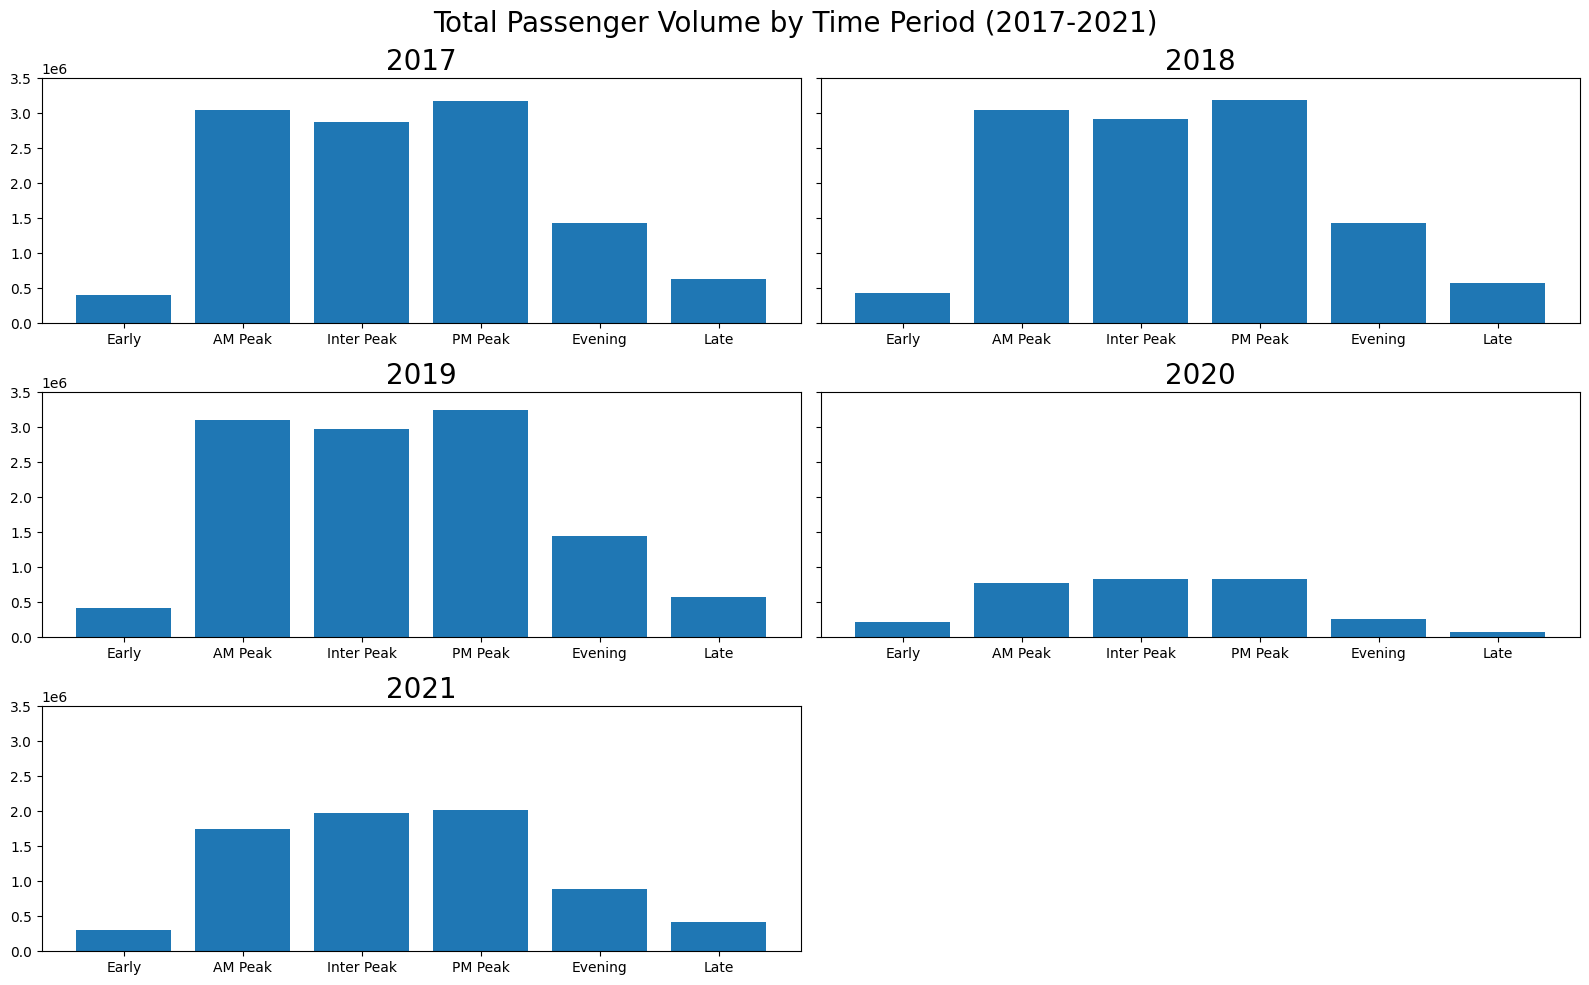

In [229]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

# Bar Chart Breakdown
# axis[1].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(),
#             x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
# axis[1].set_title("Bar Chart Breakdown");
# axis[1].set_ylim(0, 3_500_000); # added line to set y limit

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='MTF'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='MTT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)
axis[2,0].set_ylim(0, 3_500_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20)

figure.delaxes(axis[2,1])


**Friday**

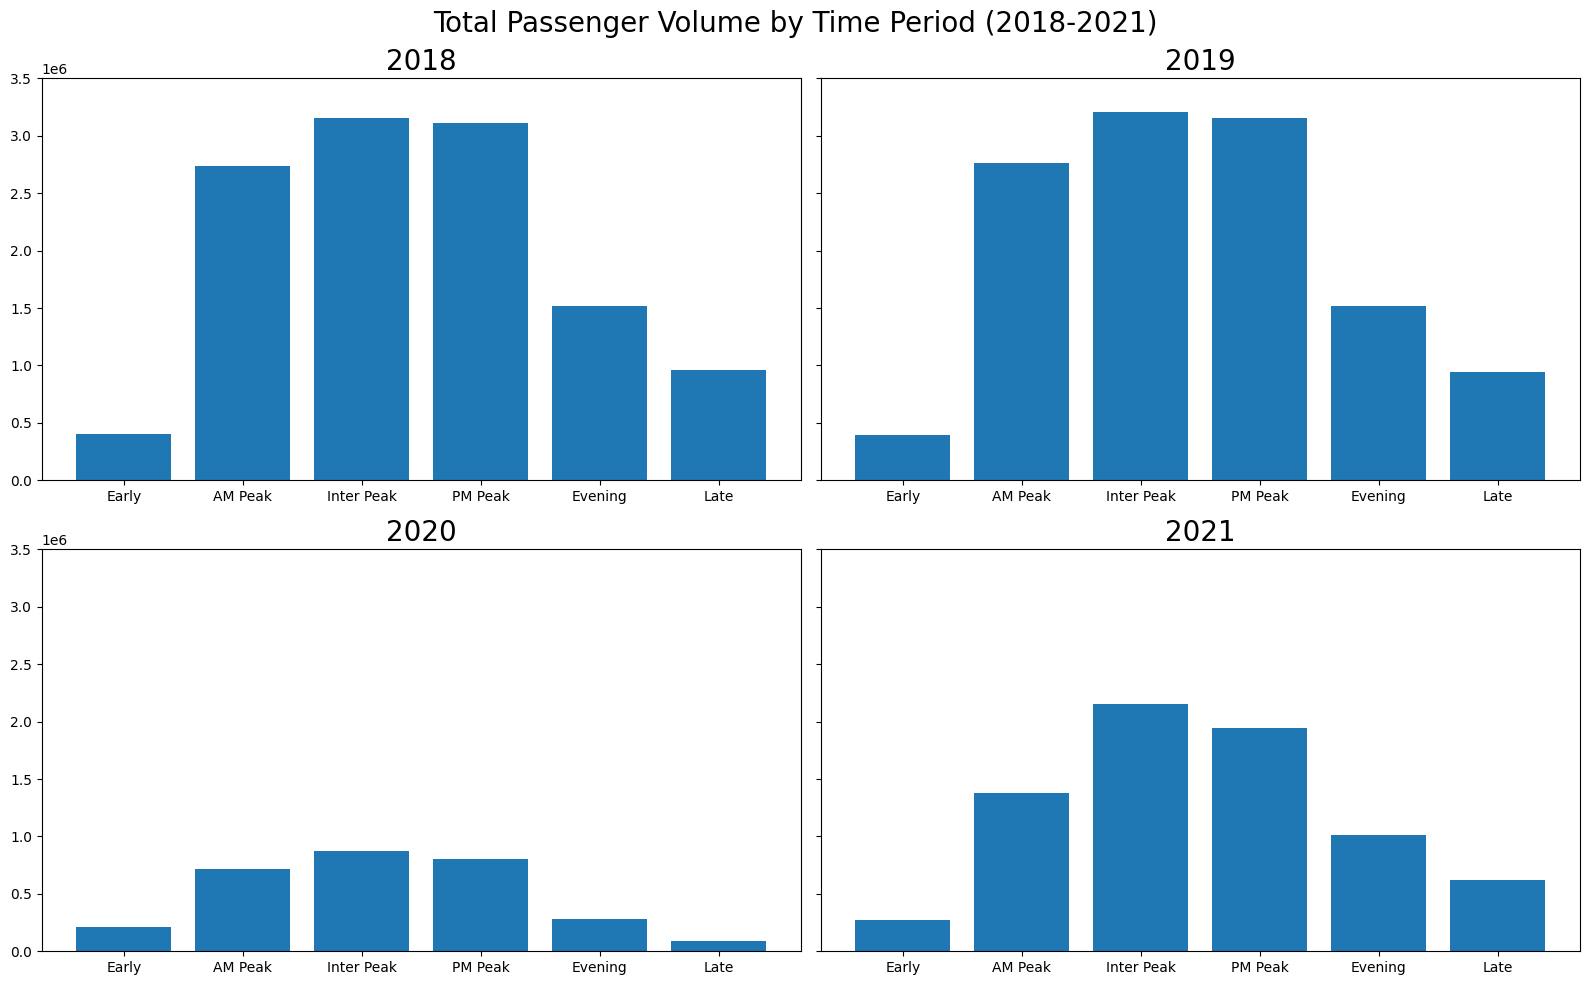

In [230]:
figure, axis = plt.subplots(2, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2018hr[df2018hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2018", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2019hr[df2019hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2020hr[df2020hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2020", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2021hr[df2021hr['day']=='FRI'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_500_000)
axis[0,1].set_ylim(0, 3_500_000)
axis[1,0].set_ylim(0, 3_500_000)
axis[1,1].set_ylim(0, 3_500_000)

# On the 2017 data, Friday is not classified separately and is included as 'MTF' unlike subsequent years

figure.suptitle("Total Passenger Volume by Time Period (2018-2021)", fontsize=20);

**Saturdays**

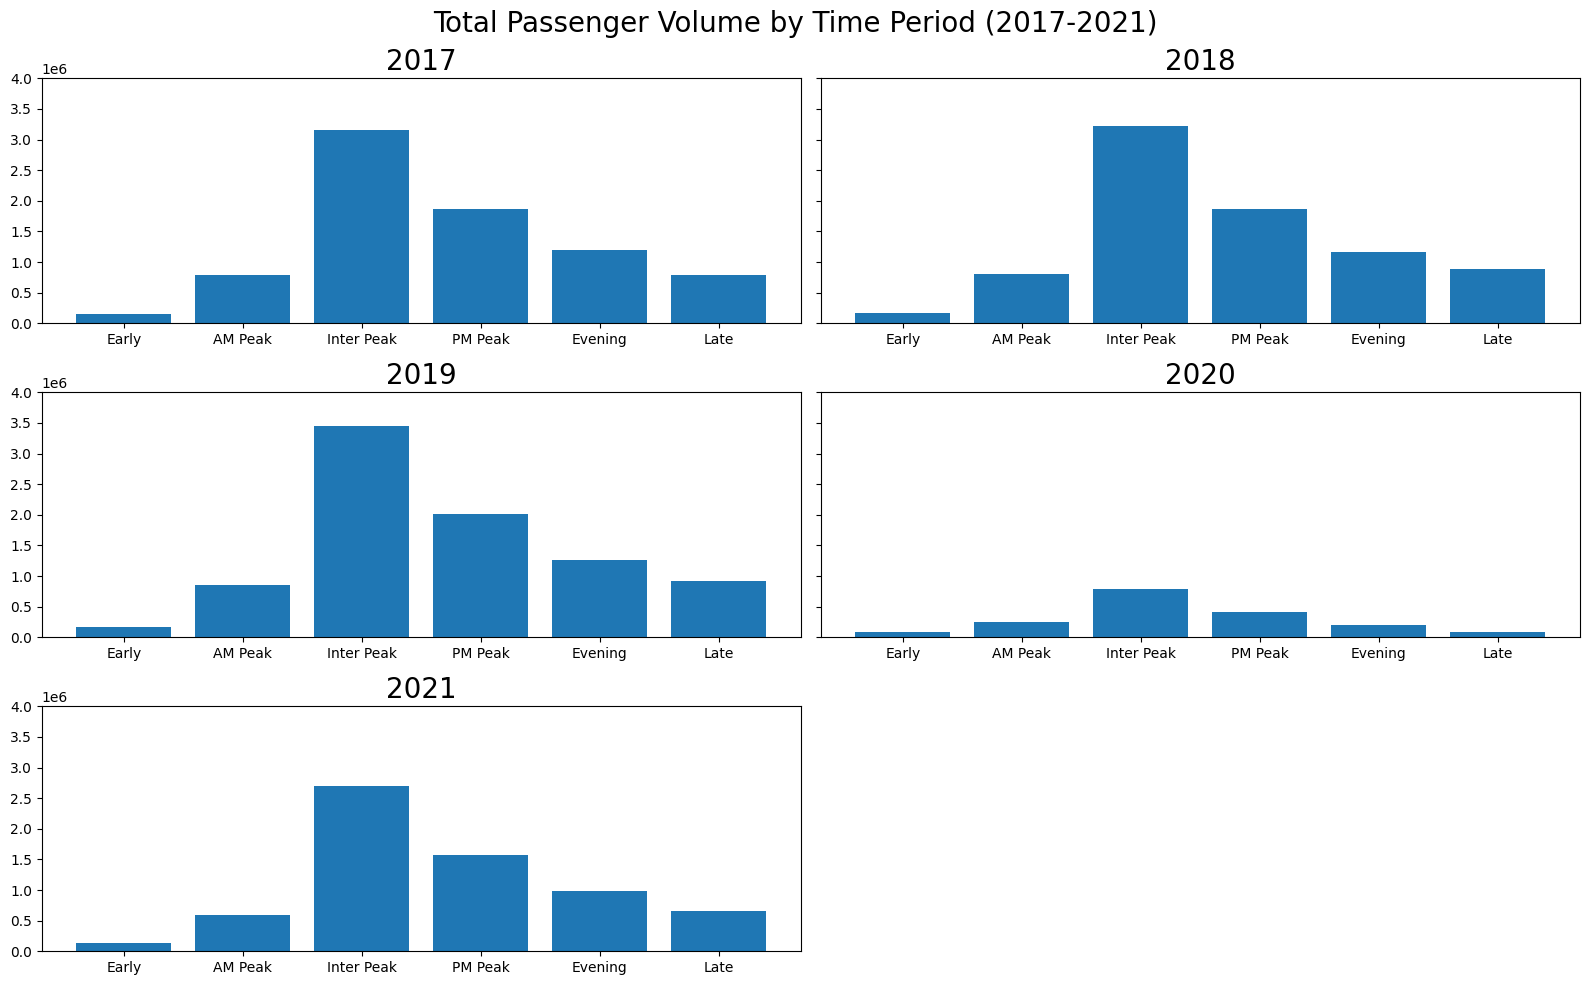

In [231]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SAT'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 4_000_000)
axis[0,1].set_ylim(0, 4_000_000)
axis[1,0].set_ylim(0, 4_000_000)
axis[1,1].set_ylim(0, 4_000_000)
axis[2,0].set_ylim(0, 4_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Sundays**

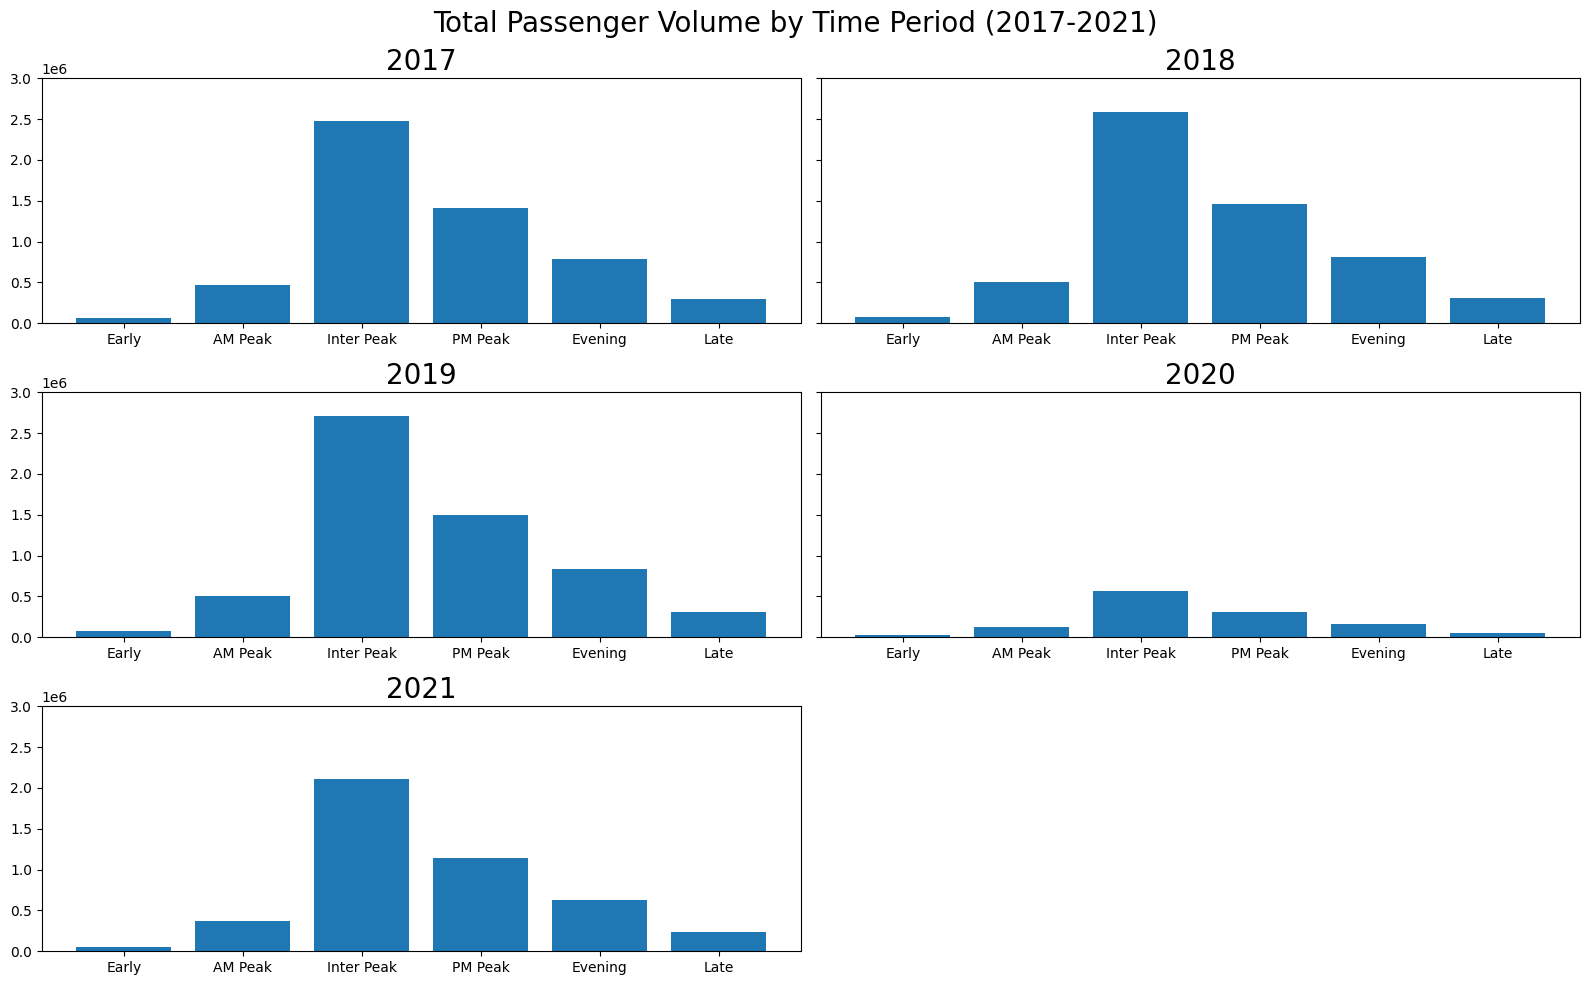

In [232]:
figure, axis = plt.subplots(3, 2, figsize=(16,10), sharey=True,  tight_layout=True)
labels=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late']
startangle=270
explode=(0.02, 0.02, 0.02, 0.02, 0.02, 0.02)
autopct='%1.2f%%'
fontsize=20

axis[0, 0].bar(height=df2017hr[df2017hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 0].set_title("2017", fontdict={'fontsize': fontsize});

axis[0, 1].bar(height=df2018hr[df2018hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[0, 1].set_title("2018", fontdict={'fontsize': fontsize});

axis[1, 0].bar(height=df2019hr[df2019hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 0].set_title("2019", fontdict={'fontsize': fontsize});

axis[1, 1].bar(height=df2020hr[df2020hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[1, 1].set_title("2020", fontdict={'fontsize': fontsize});

axis[2, 0].bar(height=df2021hr[df2021hr['day']=='SUN'].sum(numeric_only=True)[3:].to_list(), 
               x=['Early', 'AM Peak', 'Inter Peak', 'PM Peak', 'Evening', 'Late'])
axis[2, 0].set_title("2021", fontdict={'fontsize': fontsize});

axis[0,0].set_ylim(0, 3_000_000)
axis[0,1].set_ylim(0, 3_000_000)
axis[1,0].set_ylim(0, 3_000_000)
axis[1,1].set_ylim(0, 3_000_000)
axis[2,0].set_ylim(0, 3_000_000)

figure.suptitle("Total Passenger Volume by Time Period (2017-2021)", fontsize=20);

figure.delaxes(axis[2,1])

**Presented below is the Entry/Exit figures by time period, as percenatges, over the years**

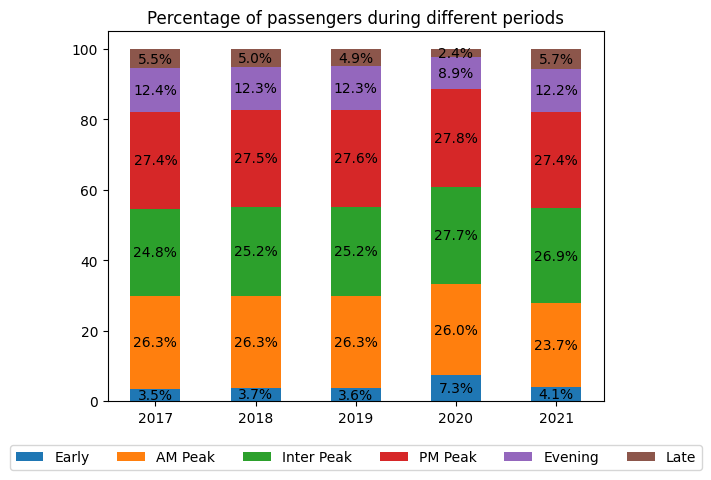

In [233]:
x = ('2017', '2018', '2019', '2020', '2021');

periods = {
    'Early': np.array([410606, 426922, 422622, 217860, 301384]), 
    'AM Peak': np.array([3050039, 3049475, 3100335, 779180, 1744411]),   
    'Inter Peak': np.array([2880265, 2920222, 2971552, 829986, 1979360]),  
    'PM Peak': np.array([3183198, 3194781, 3254342, 834653, 2011992]),
    'Evening': np.array([1439332, 1430876, 1447731, 266806, 893644]),
    'Late': np.array([637978, 580478, 581302, 71054, 419004])
};

total = np.sum(list(periods.values()), axis=0);
bottom = np.zeros(len(x));

width = 0.5

fig, ax = plt.subplots();

for boolean, periods in periods.items():
    p = ax.bar(x, periods / total * 100, width, label=boolean, bottom=bottom);
    bottom += periods / total * 100
    for i, bar in enumerate(p):
        x_pos = bar.get_x() + bar.get_width() / 2
        y_pos = bar.get_y() + bar.get_height() / 2
        value = '{:.1f}%'.format(periods[i] / total[i] * 100);
        ax.text(x_pos, y_pos, value, ha='center', va='center');

ax.set_title("Percentage of passengers during different periods");

# Move the legend outside the axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=6);

plt.show();

###### Observations 🔎

- 🦠 Unsurprisingly, the Covid-19 pandemic has had a significant impact on TfL's passenger numbers in 2020 and 2021. 

- 📉 The fraction of passengers travelling during the 'AM Peak' period has dropped from an average of 26.3% to 23.7% in 2021. 💼 This could be due to the [rise of hybrid/remote work schedules](https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/articles/ishybridworkingheretostay/2022-05-23), as more people are able to work from home and avoid the rush hour commute. The other periods have remained relatively stable over the years.

It will be interesting to see how these trends develop in 2022 when more data is made available.

### Creating indexes

Indexes can also be applied to gain insights into passenger behavior and usage patterns. By creating an index based on factors such as station popularity, time of day, and day of the week, we can identify the busiest and least busy stations, as well as how other stations on the network are trending.

As we noticed earlier, the Covid-19 pandemic has had a drastic effect on commuter figures through London. To find the impact of the pandemic on ridership at specific stations, the average passengers for pre and post-covid years is calculated and used to create the 'Post-Covid impact' index (PCI). The calculated index will be a factor between 0 & 1 representing how close the ridership is to pre-COVID levels. That is to say:
- *The closer a station's 'Post-Covid impact' index is to 1, the less affected it was because its commuter figure is closer to pre-pandemic levels.* 
- *and the closer a station's index is to 0, the more affected it was as its commuter figure is significantly lower than pre-pandemic levels.* 

It is worth noting that some specific change in passenger behavior in this period is not attributable to the effects of COVID. For example, changes in passenger behaviour (adoption of hybrid/remote work schedules), station closure or network changes can also impact the data. We will look into this later on and comment on any areas where this is likely the case.

**Note:** 
All stations which opened after 2019 or were closed for a large portion of this period (Heathrow Terminal 4), will not be considered in this analysis.

In [234]:
df_stations['Post-Covid impact'] = 1-(df_stations[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True) - 
                                    df_stations[["En/Ex 2021"]].mean(axis=1, skipna=False))/(
                                    df_stations[["En/Ex 2017", "En/Ex 2018", "En/Ex 2019"]].mean(axis=1, skipna=True)) 
df_stations.sort_values('Post-Covid impact', ascending=True, inplace=True)
df_stations=df_stations[df_stations['Post-Covid impact'] > 0] 
df_stations.head(5)

NLC           Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
291  858.0            Poplar         NaN         NaN         NaN         NaN   
33   536.0  Cannon Street LU   4109347.0   4540496.0   3932511.0   3947306.0   
184  695.0  St. James's Park  13084320.0  13189508.0  13424654.0  13300266.0   
131  639.0     Mansion House   5109887.0   5320220.0   7034245.0   7199238.0   
183  694.0    Russell Square  13592202.0  13593560.0  14045262.0  14182721.0   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
291         NaN         NaN         NaN         NaN         NaN         NaN   
33    4047494.0   4088480.0   4644524.0   5299813.0   7485065.0   8983249.0   
184  13496515.0  14261759.0  14726104.0  15730145.0  15698186.0  14934536.0   
131   7416215.0   5645557.0   5769586.0   6195631.0   5561213.0   6136459.0   
183  14728330.0  13436431.0  12951499.0  13076625.0  13328942.0  12345236.0   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
291   4713917.0   4567851.0   4967283.0   1135902.0    825604.0   
33    8996282.0   7399745.0   7108243.0   1559861.0   2147772.0   
184  13664987.0  14169247.0  14479978.0   2919119.0   3901970.0   
131   6140305.0   7106682.0   6789496.0   1067130.0   2088948.0   
183  10853914.0  11896108.0  12274252.0   2744465.0   3655414.0   

                LINES             NETWORK London Underground Elizabeth Line  \
291               DLR                 NaN                NaN            NaN   
33   Circle, District  London Underground                Yes            NaN   
184  Circle, District  London Underground                Yes            NaN   
131  Circle, District  London Underground                Yes            NaN   
183        Piccadilly  London Underground                Yes            NaN   

    London Overground  DLR Night Tube?  Post-Covid impact  
291               NaN  Yes          No           0.173823  
33                NaN  NaN          No           0.274134  
184               NaN  NaN          No           0.276643  
131               NaN  NaN          No           0.312772  
183               NaN  NaN         Yes           0.313104

In [235]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index) # Dropping any stations on the Tramlink Network
df1.sample(1)

NLC             NAME  EASTING  NORTHING     LINES NETWORK  \
378  6560  Canary Wharf EL   537650    180451  TfL Rail     NaN   

    London Underground Elizabeth Line London Overground  DLR Zone         x  \
378                NaN            Yes               NaN  NaN    2 -0.018027   

             y Night Tube?  
378  51.506233          No

**Plotted below are the most affected stations by our 'Post-Covid impact' index**

In [236]:
px.bar(df_stations[df_stations['Post-Covid impact'] > 0] 
       # Drops stations with NaN or 0 values (Station was closed)
       .head(20),
       y='Station',
       x='Post-Covid impact',
       title='Bottom 20 Stations by PCI',
       height=750
      )

**Plotted below are the least affected stations by our 'Post-Covid impact' index**

In [237]:
px.bar(df_stations[df_stations['Post-Covid impact'] > 0] 
       # Drops stations with NaN or 0 values (Station was closed)
       .tail(20),
       y='Station',
       x='Post-Covid impact',
       title='Top 20 Stations by PCI',
       height=750
      )

In [238]:
# The figures may add up to more than 30 as a station can be on multiple TfL networks

print('Out of the top 30 stations by PCI:')
print('-', df_stations.tail(30)[df_stations.tail(30)['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', df_stations.tail(30)[df_stations.tail(30)['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', df_stations.tail(30)[df_stations.tail(30)['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', df_stations.tail(30)[df_stations.tail(30)['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')
print(" ")
print('Out of the bottom 30 stations by PCI:')
print('-', df_stations.head(30)[df_stations.head(30)['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', df_stations.head(30)[df_stations.head(30)['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', df_stations.head(30)[df_stations.head(30)['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', df_stations.head(30)[df_stations.head(30)['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')

Out of the top 30 stations by PCI:
- 1 are on the London Underground
- 15 are on the London Overground
- 7 are on the DLR
- 9 are on the Elizabeth Line
 
Out of the bottom 30 stations by PCI:
- 28 are on the London Underground
- 0 are on the London Overground
- 3 are on the DLR
- 1 are on the Elizabeth Line


As we can see the stations most affected are largely London Underground stations. 
Also, a lot of the newly opened Elizabeth line stations score very highly on PCI indicating little or no effect post-pandemic 

Another interesting angle is looking at how the network has changed in the past few years.

As I mentioned earlier, not all recent change is attributable to the effects of the pandemic. For a snapshot of this, we will create two indices 'Upturn' and 'Downturn'. These indexes will look at the stations with the greatest upturn and downturn in commuter figures after 2020 respectively. 

In [239]:
df_downturn=pd.merge(df_merged[df_merged['En/Ex 2020'] > df_merged['En/Ex 2021']],
                     df1,
                     on='NLC') # Creating a DF of all the stations which saw a decrease in commuter figures
df_downturn.drop([32], inplace=True) # Dropping East Acton Station
df_downturn['Downturn'] = df_downturn["En/Ex 2021"]/df_downturn["En/Ex 2020"] # Calculating the 'Downturn' of the selected stations
df_downturn = df_downturn[['Downturn'] + [x for x in df_downturn.columns if x != 'Downturn']] # Just rearrnging the order of the columns to place Downturn first 
df_downturn = df_downturn.query('Downturn <= 0.75') # Setting the qualifier for stations in the DF
df_downturn.sort_values('Downturn', ascending=True, inplace=True)
df_downturn['Downturn']=df_downturn['Downturn'].round(3)
df_downturn = df_downturn.head(30)
df_downturn["Coordinates"] = list(zip(df_downturn.EASTING, df_downturn.NORTHING)) # Creating geodata
df_downturn["Coordinates"] = df_downturn["Coordinates"].apply(Point)
gdf_downturn = gpd.GeoDataFrame(df_downturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_downturn.shape[0] # Shows how many stations are present in the DF.

30

**Notes:**
- East Acton station [underwent extensive renovation from 2021 to 2022](https://web.archive.org/web/20230130222836/https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-2730-2122) and was closed during this period. As such, it will be dropped as its data is incomplete.


In [240]:
px.bar(df_downturn.sort_values('Downturn', ascending=True),
       # Threshold of 7 non-NA values to filter stations with less than 4 years of data
       y='Station',
       x='Downturn',
       height=850,
       title='TfL Stations by Downturn',
       range_x=[0, 1]
)

In [241]:
df_upturn=pd.merge(df_merged[df_merged['En/Ex 2020'] < df_merged['En/Ex 2021']],              
                   df1,              
                   on='NLC') # Creating a DF of all the stations which saw an increase in commuter figures
df_upturn['Upturn'] = df_upturn["En/Ex 2021"]/df_upturn["En/Ex 2020"] # Calculating the 'Upturn' of the selected stations
df_upturn = df_upturn[['Upturn'] + [x for x in df_upturn.columns if x != 'Upturn']] # Just rearrnging the order of the columns to place Downturn first 
df_upturn = df_upturn.query('Upturn >= 1.7') # Setting the qualifier for stations in the DF
df_upturn.sort_values('Upturn', ascending=False, inplace=True)
df_upturn['Upturn']=df_upturn['Upturn'].round(3)
df_upturn = df_upturn.head(30)
df_upturn["Coordinates"] = list(zip(df_upturn.EASTING, df_upturn.NORTHING)) # Creating geodata
df_upturn["Coordinates"] = df_upturn["Coordinates"].apply(Point)
gdf_upturn = gpd.GeoDataFrame(df_upturn, geometry="Coordinates") # Creates a Geopandas DF with the geodata
df_upturn.shape[0] # Shows how many stations are present in the DF.

30

In [242]:
df_upturn.head(5)

Upturn     NLC     Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  \
231  62.484  3155.0     Twyford         NaN         NaN         NaN   
228  19.235  3147.0  Maidenhead         NaN         NaN         NaN   
230  12.786  3151.0      Taplow         NaN         NaN         NaN   
234   9.261  3172.0      Slough         NaN         NaN         NaN   
236   8.417  3176.0     Burnham         NaN         NaN         NaN   

     En/Ex 2010  En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  \
231         NaN         NaN         NaN         NaN         NaN         NaN   
228         NaN         NaN         NaN         NaN         NaN         NaN   
230         NaN         NaN         NaN         NaN         NaN         NaN   
234         NaN         NaN         NaN         NaN         NaN         NaN   
236         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2016  En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
231         NaN         NaN         NaN         NaN     13407.0    837725.0   
228         NaN         NaN         NaN         NaN    102141.0   1964707.0   
230         NaN         NaN         NaN         NaN     20878.0    266945.0   
234         NaN         NaN         NaN         NaN    234410.0   2170889.0   
236         NaN         NaN         NaN         NaN    106258.0    894325.0   

           NAME  EASTING  NORTHING     LINES NETWORK London Underground  \
231     Twyford   479041    175787  TfL Rail     NaN                NaN   
228  Maidenhead   488724    180745  TfL Rail     NaN                NaN   
230      Taplow   491579    181340  TfL Rail     NaN                NaN   
234      Slough   497838    180157  TfL Rail     NaN                NaN   
236     Burnham   494007    181378  TfL Rail     NaN                NaN   

    Elizabeth Line London Overground  DLR Zone         x          y  \
231            Yes               NaN  NaN   -1 -0.863307  51.475533   
228            Yes               NaN  NaN   -1 -0.722675  51.518667   
230            Yes               NaN  NaN   -1 -0.681385  51.523561   
234            Yes               NaN  NaN   -1 -0.591525  51.511879   
236            Yes               NaN  NaN   -1 -0.646388  51.523504   

    Night Tube?                    Coordinates  
231          No  POINT (479041.000 175787.000)  
228          No  POINT (488724.000 180745.000)  
230          No  POINT (491579.000 181340.000)  
234          No  POINT (497838.000 180157.000)  
236          No  POINT (494007.000 181378.000)

In [243]:
px.bar(df_upturn.sort_values('Upturn', ascending=True),
       y='Station',
       x='Upturn',
       height=850,
       title='TfL stations by Upturn',
       log_x=True 
       # I made this a log graph to since Twyford's PCI was so high
)

**Below we can see the breakdown of which networks carry these stations**

In [244]:
print('Out of the top 30 stations by Downturn:')
print('-', gdf_downturn[gdf_downturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground') 
print('-', gdf_downturn[gdf_downturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', gdf_downturn[gdf_downturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', gdf_downturn[gdf_downturn['Elizabeth Line'] == 'Yes'].shape[0], 'is on the Elizabeth Line')
print(" ")
print('Out of the top 30 stations by Upturn:')
print('-', gdf_upturn[gdf_upturn['London Underground'] == 'Yes'].shape[0], 'are on the London Underground')
print('-', gdf_upturn[gdf_upturn['London Overground'] == 'Yes'].shape[0], 'are on the London Overground')
print('-', gdf_upturn[gdf_upturn['DLR'] == 'Yes'].shape[0], 'are on the DLR')
print('-', gdf_upturn[gdf_upturn['Elizabeth Line'] == 'Yes'].shape[0], 'are on the Elizabeth Line')

# The figures may add up to more than 30 as a station can be on multiple TfL networks

Out of the top 30 stations by Downturn:
- 28 are on the London Underground
- 5 are on the London Overground
- 0 are on the DLR
- 1 is on the Elizabeth Line
 
Out of the top 30 stations by Upturn:
- 16 are on the London Underground
- 2 are on the London Overground
- 5 are on the DLR
- 10 are on the Elizabeth Line


###### Observations 🔎
- 📉 We notice that 28 of the 30 stations trending downward are on the London Underground.
- 📈 7 of the stations on the newly built Elizabeth line also flesh out the stations trending upward.

### Plotting Stations

In this next segment, we will be creating indexes and plotting the TfL stations to analyze the commuter data. 

#### A couple things we'll need to make our maps look better...

These are a couple utlities and calls that will make our graphs down below look better and more informative. Again, you can choose to collapse this section with a click of a button 🤏 and move on to the next. That is where all the fun is anyway.

In [245]:
tube_lines = {
    "Bakerloo":             {"id":"B", "colour":"#B36305", "network":"Tube"},
    "Central":              {"id":"C", "colour":"#E32017", "network":"Tube"},
    "Circle":               {"id":"I", "colour":"#FFD300", "network":"Tube"},
    "Elizabeth line":       {"id":"X", "colour":"#7156A5", "network":"Rail"},
    "DLR":                  {"id":"L", "colour":"#00A4A7", "network":"Rail"},
    "District":             {"id":"D", "colour":"#00782A", "network":"Tube"},
    "Hammersmith & City":   {"id":"H", "colour":"#F3A9BB", "network":"Tube"},
    "Jubilee":              {"id":"J", "colour":"#A0A5A9", "network":"Tube"},
    "Metropolitan":         {"id":"M", "colour":"#9B0056", "network":"Tube"},
    "Northern":             {"id":"N", "colour":"#000000", "network":"Tube"},
    "London Overground":    {"id":"O", "colour":"#EE7C0E", "network":"Rail"},
    "Piccadilly":           {"id":"P", "colour":"#003688", "network":"Tube"},
    "Tramlink":             {"id":"T", "colour":"#84B817", "network":"Tramlink"},
    "Victoria":             {"id":"V", "colour":"#0098D4", "network":"Tube"},
    "Waterloo & City":      {"id":"W", "colour":"#95CDBA", "network":"Tube"}
} # The Tube lines and their corresponding colour scheme and network.

In [246]:
# Define the style function for 
def style_function(feature):
    line_id = feature["properties"]["id"]
    line_colour = tube_lines[line_id]["colour"]
    return {
        "color": line_colour,
        "weight": 4,
        "opacity": 0.8,
    }

In [247]:
ldn_df = gpd.read_file("data/Geodata/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
ldn_df.sample(3)

NAME   GSS_CODE  HECTARES  NONLD_AREA ONS_INNER  SUB_2009  SUB_2006  \
28  Hackney  E09000012  1904.902       0.000         T       NaN       NaN   
15  Enfield  E09000010  8220.025       0.000         F       NaN       NaN   
30   Newham  E09000025  3857.806     237.637         T       NaN       NaN   

                                             geometry  
28  POLYGON ((531928.400 187801.500, 531935.700 18...  
15  POLYGON ((531023.500 200933.600, 531039.900 20...  
30  MULTIPOLYGON (((544065.000 183254.100, 544062....

In [248]:
df1 = pd.read_csv('data/Geodata/Stations_20220221.csv')
df1 = df1.drop(df1[df1.LINES == 'Tramlink'].index)
df1.drop(columns=['NETWORK',
                  'LINES',
                  'London Underground', 
                  'Elizabeth Line', 
                  'London Overground', 
                  'DLR'], inplace=True)
df1.sample(4)

NLC             NAME  EASTING  NORTHING Zone         x          y  \
387  6879      Harold Wood   554777    190568    6  0.234667  51.592199   
364  5362      Forest Hill   535400    172936    3 -0.051690  51.438725   
236   748          Watford   509569    196596    7 -0.415833  51.656992   
242   754  Westbourne Park   524901    181756    2 -0.199554  51.520412   

    Night Tube?  
387          No  
364          No  
236          No  
242          No

In [249]:
df1["Coordinates"] = list(zip(df1.EASTING, df1.NORTHING))
df1["Coordinates"] = df1["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df1, geometry="Coordinates")
gdf.sample()

NLC          NAME  EASTING  NORTHING Zone        x          y  \
195  704  South Ealing   517575    179354    3 -0.30592  51.500391   

    Night Tube?                    Coordinates  
195         Yes  POINT (517575.000 179354.000)

In [250]:
gdf_night=gdf[gdf['Night Tube?']=='Yes']

In [251]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"
london_ug = f"{url}/lu_lines.geojson"
nighttube = f"{url}/night_tube.geojson"

Now, we'll set a threshold for which station will make it on our maps and explain any reasons for disqualification

In [252]:
df_plot=df_stations[df_stations['Post-Covid impact'] > 0].sort_values('Post-Covid impact', ascending=False)
df_plot['Post-Covid impact']=df_plot['Post-Covid impact'].round(3)
print(df_plot.shape)
df_plot.head()

(415, 25)


NLC          Station  En/Ex 2007  En/Ex 2008  En/Ex 2009  En/Ex 2010  \
416  3087.0    Paddington NR         NaN         NaN         NaN         NaN   
304   887.0     Custom House         NaN         NaN         NaN         NaN   
421  3191.0          Hanwell         NaN         NaN         NaN         NaN   
419  3187.0         Southall         NaN         NaN         NaN         NaN   
298   866.0  West India Quay         NaN         NaN         NaN         NaN   

     En/Ex 2011  En/Ex 2012  En/Ex 2013  En/Ex 2014  En/Ex 2015  En/Ex 2016  \
416         NaN         NaN         NaN         NaN         NaN         NaN   
304         NaN         NaN         NaN         NaN         NaN         NaN   
421         NaN         NaN         NaN         NaN         NaN         NaN   
419         NaN         NaN         NaN         NaN         NaN         NaN   
298         NaN         NaN         NaN         NaN         NaN         NaN   

     En/Ex 2017  En/Ex 2018  En/Ex 2019  En/Ex 2020  En/Ex 2021  \
416         NaN   4086849.0   4722949.0   5977071.0   8513238.0   
304         0.0   2242447.0   2205585.0    774342.0   2065445.0   
421         NaN    364993.0    675795.0    387664.0    576380.0   
419         NaN   1723747.0   2563229.0   1429088.0   2294079.0   
298   1280769.0   1355439.0   1305312.0    296160.0   1329826.0   

             LINES NETWORK London Underground Elizabeth Line  \
416       TfL Rail     NaN                NaN            Yes   
304  DLR, TfL Rail     NaN                NaN            Yes   
421       TfL Rail     NaN                NaN            Yes   
419       TfL Rail     NaN                NaN            Yes   
298            DLR     NaN                NaN            NaN   

    London Overground  DLR Night Tube?  Post-Covid impact  
416               NaN  NaN          No              1.933  
304               NaN  Yes          No              1.393  
421               NaN  NaN          No              1.108  
419               NaN  NaN          No              1.070  
298               NaN  Yes          No              1.012

##### Done!

Now that we have all this set up, we can begin creating plots of our data.

#### Plots using Folium, Geopandas & Matplotlib

##### As a start, here is every station on the TfL network (including Tramlink!)

<Axes: >

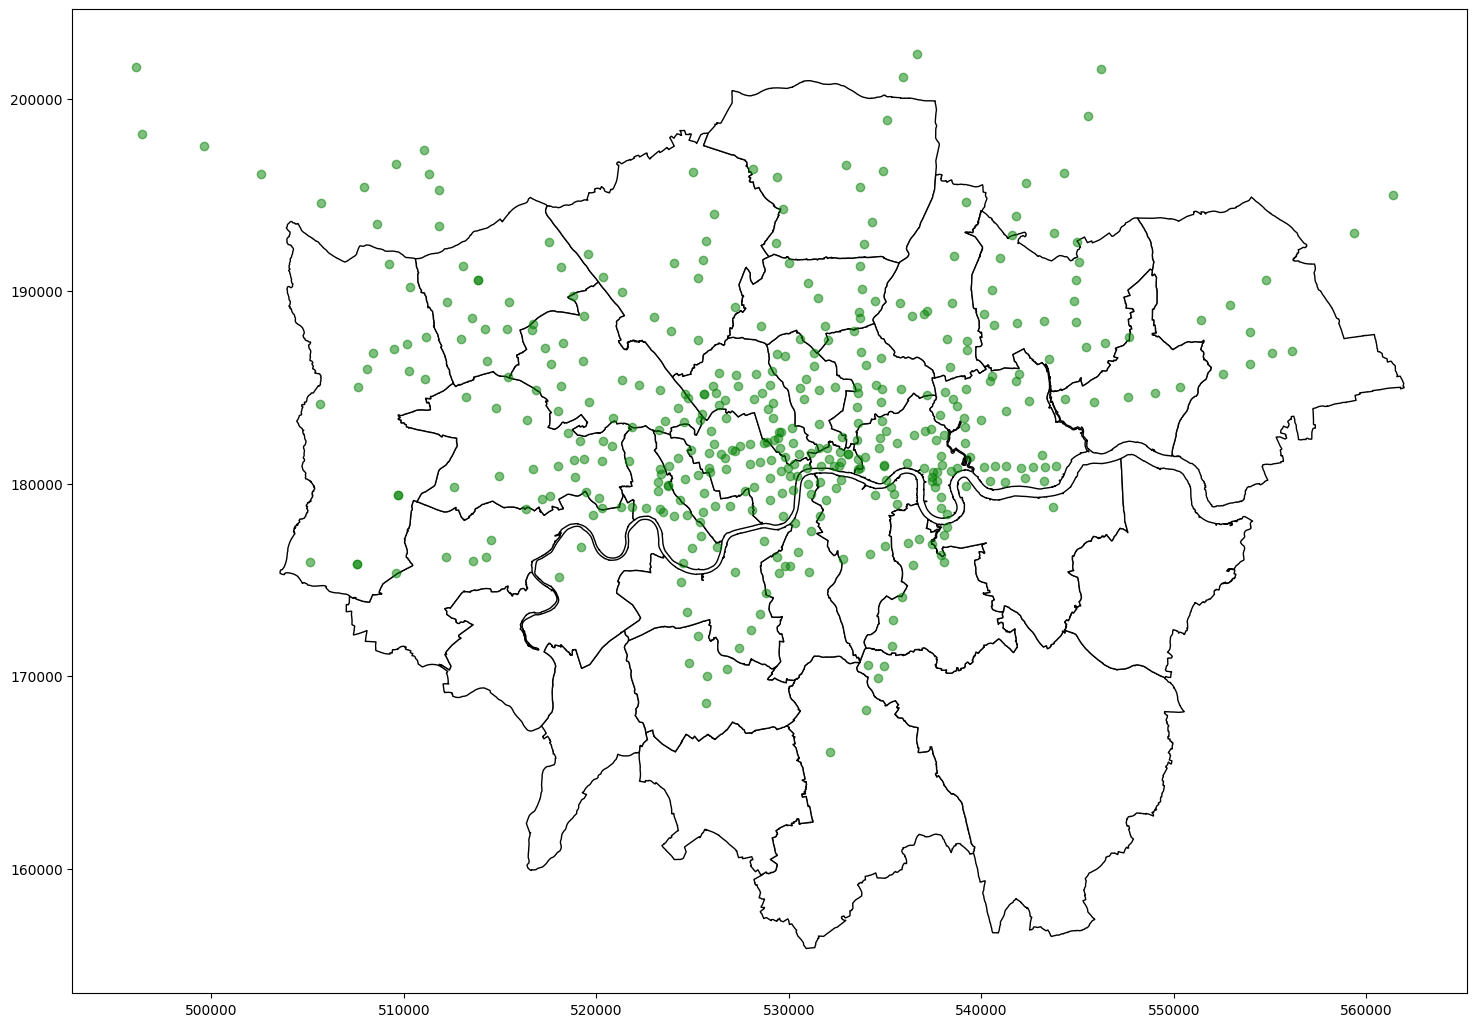

In [253]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot,
                df1,
                on='NLC',   
                how='inner').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='inner')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='inner').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))

ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_all.plot(ax=gax, color='green', alpha = 0.5)

**This is a nice map but it doesnt really show us where the stations are or which lines are running through them.**
 
 To produce a more informative map, we can use Folium! Here is a map of all the TfL lines running through London plotted using Folium:

In [254]:
# Create the GeoJson layer with the style function
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)

tfl_layer = folium.GeoJson(
    tfl_network,
    name="Tfl map",
    style_function=style_function
)
tube_layer = folium.GeoJson(
    london_ug,
    name="Tube map",
    style_function=style_function
)
# Add the layer to the map
tfl_layer.add_to(map)
# nighttube.add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 500px; 
     border: 2px solid grey; z-index:9999; font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

map

##### Now, here is the map containing all TfL stations using Folium and json: 

In [255]:
map = folium.Map(location=[51.55, -0.33], tiles="Stamen Terrain", zoom_start=9)
# folium.GeoJson(data=ldn_df["geometry"]).add_to(map)

for i,row in gdf.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(str(row["NAME"] + ' St.'))
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe, min_width= 100, max_width=200)
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup).add_to(map)
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)

folium.LayerControl().add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

map

So now we know how the plots look, let's build some maps

Earlier, we created the 'Post-covid index' to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

###### Here we have the top 30 & bottom 30 stations by 'Post-covid index' in blue and red. 

<Axes: >

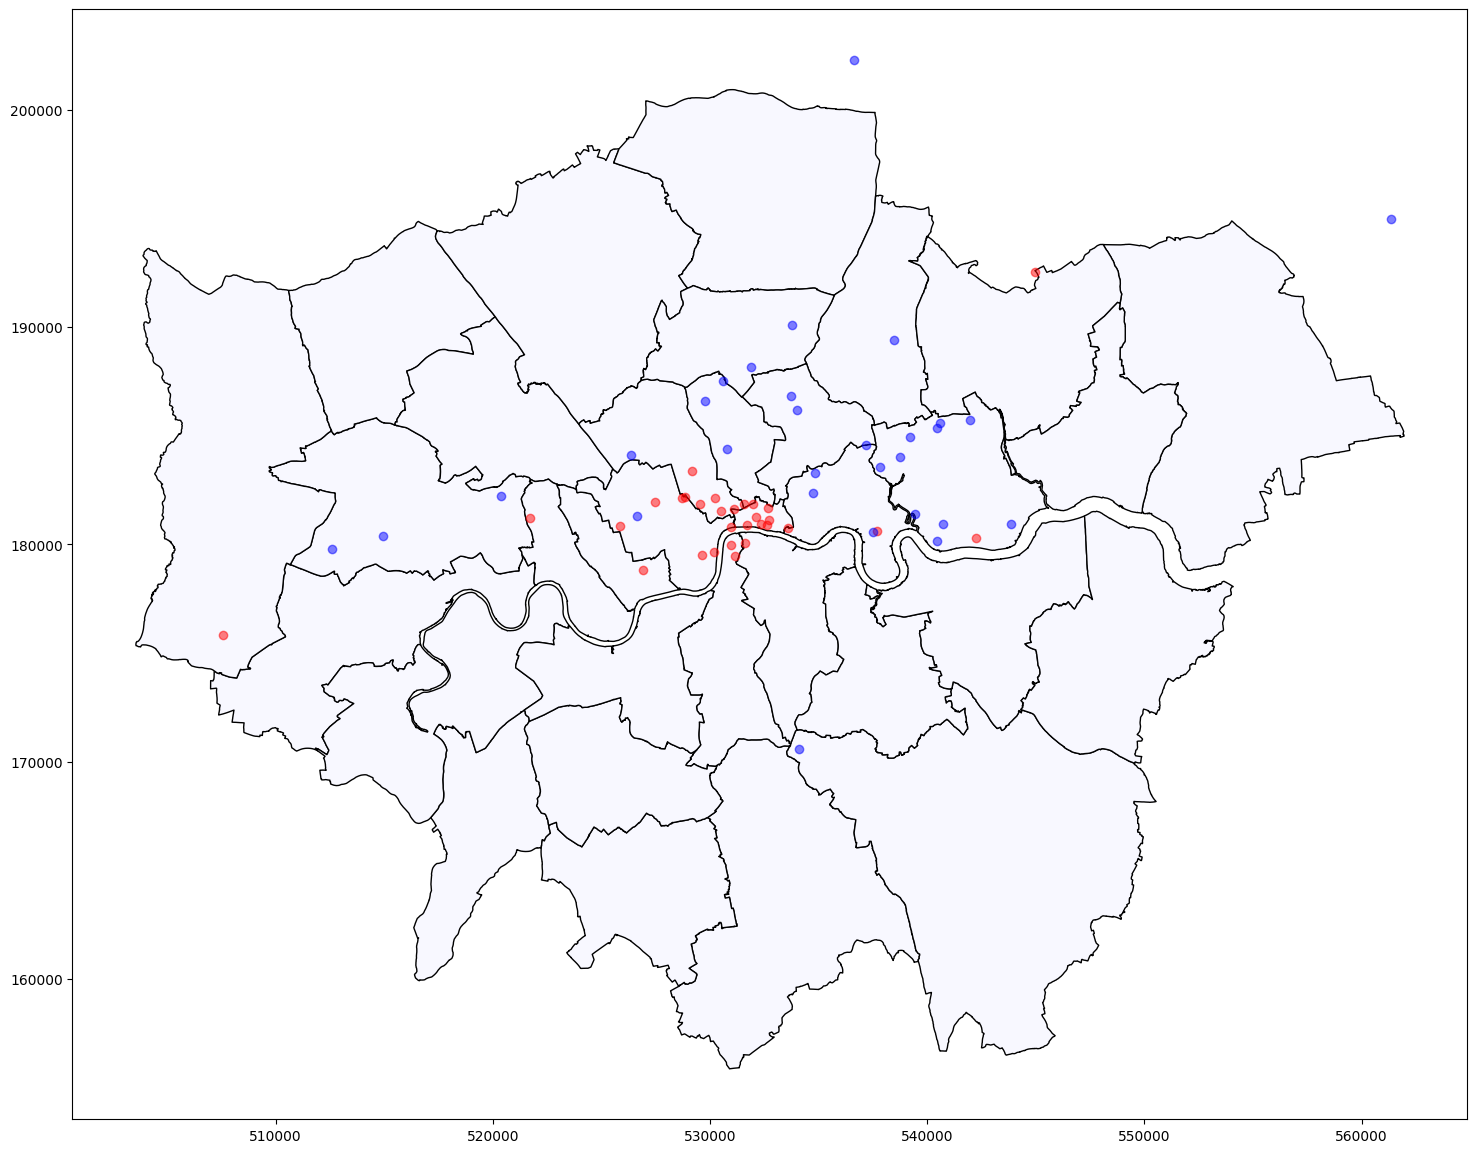

In [261]:
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="ghostwhite"); 
gdf_btm30.plot(ax=gax, color='red', alpha = 0.5) # Plotting of the bottom 30 stations by 'Post-Covid impact'
gdf_top30.plot(ax=gax, color='blue', alpha = 0.5) # Plotting of the top 30 stations by 'Post-Covid impact'

In [257]:
# Setting up the link to a Tfl route map I modified to show the individual lines
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"
style1 = {'fillColor': '#228B22', 'lineColor': '#228B22'}
style2 = {'fillColor': '#00FFFFFF', 'lineColor': '#00FFFFFF'}
# Setting up map to focus in on London
map = folium.Map(location=[51.55, -0.2], tiles="Stamen Terrain", zoom_start=10)

for i,row in gdf_top30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}', 
                           width='100px', 
                           height='150px')

    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='lightblue', icon='')).add_to(map)
    
for i,row in gdf_btm30.iterrows():
    # Setup the contents of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n PCI: {str(row["Post-Covid impact"])}',
                          width='100px',
                          height='150px')
    
    # Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    # Add each station to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
# Initialise the tfl route map
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
# folium.GeoJson(data=ldn_df2["geometry"], name="Inner/Outer London map").add_to(map)

# Create a legend using the tube_lines dictionary
legend_html = """
<div style="position: fixed; 
     bottom: 50px; 
     left: 50px; 
     width: 160px; 
     height: 480px; 
     border: 2px solid grey; 
     z-index:9999; 
     font-size:14px;
     background-color:white;
     ">
     &nbsp; TfL Lines <br>
"""

for line_name, line_info in tube_lines.items():
    legend_html += f"""
     &nbsp; <span style="color:{line_info['colour']}; 
                  font-size: 20px;">&#9679;</span> 
                  {line_name} <br>
    """

legend_html += "</div>"

map.get_root().html.add_child(folium.Element(legend_html))

folium.LayerControl().add_to(map)
     
map

### Observations 🔎

Looking at the bottom 30 stations by Post-Covid Index, we spot a few trends:
- 21 of the 30 stations selected (70%) are within the Zone 1 fare
- Airport terminals Heathrow 2&3 EL, & London City Airport are included in the bottom 30.

For comparison, looking at the top 30 stations by Post-Covid Index:
- Only 1 of the 30 stations selected are within the Zone 1 fare zone, the Paddington NR station which has the newly finished Elizabeth line. 

Also, there is an oddity that I find difficult to explain:
- Poplar and West India Quay stations are only a few metres apart (as displayed below). Poplar usually ranks among the busiest DLR stations however Poplar ranks ***last*** among all TfL stations by PCI while West India Quay ranks in the top 30. The likely explanation would be a closure of the station but there are seemingly no reports to support this possibility. 
Other unlikely explanations were:
    *  West India Quay is near to the Canary Wharf EL station but that station only opened in May 2022 and both Poplar and West India Quay are Out-of-Station Interchanges (OSIs) for the Canary Wharf EL station.
    *  Workers commuting to the Canary Wharf may choose to go to the West India Quay station but the weekday entry and exit figures for the two stations are similar and there is no other reason to suggest chanegs in commuter behaviour. 
  
**Note:**
I had filed a FOI request to information about this [issue](https://tfl.gov.uk/corporate/transparency/freedom-of-information/foi-request-detail?referenceId=FOI-3327-2223) but was declined as 'locating, retrieving and extracting data from other information would exceed the appropriate limit.'

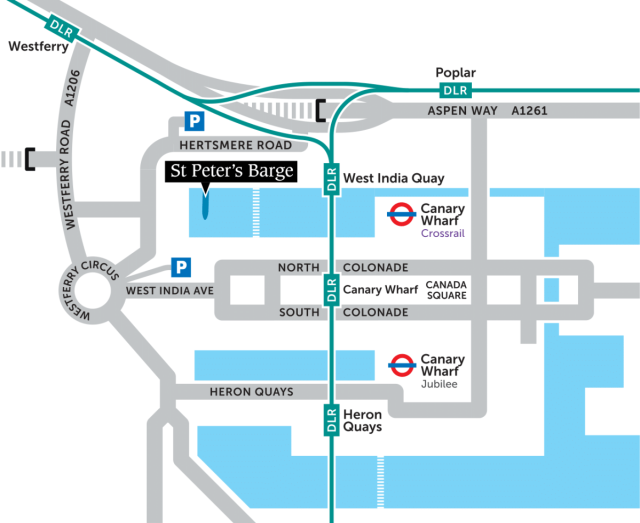

Earlier, we created the upturn and downturn indexes to take a deeper look at recent trends on the TfL network. Now for an even clearer image, we will be plotting the stations in both DFs.

In [258]:
### Creating a Geopandas dataframe of all TfL stations
df_all=pd.merge(df_plot,
                df1,
                on='NLC',   
                how='right').drop(columns=['NETWORK', 'Zone'])
df_all["Coordinates"] = list(zip(df_all.EASTING, df_all.NORTHING))
df_all["Coordinates"] = df_all["Coordinates"].apply(Point)
gdf_all = gpd.GeoDataFrame(df_all, geometry="Coordinates")

# Creating a Geopandas dataframe of the bottom 30 stations by the 'Post-Covid impact' index
df_btm30=pd.merge(df_plot.tail(30),
                  df1,
                  on='NLC',
                  how='left')
df_btm30["Coordinates"] = list(zip(df_btm30.EASTING, df_btm30.NORTHING))
df_btm30["Coordinates"] = df_btm30["Coordinates"].apply(Point)
gdf_btm30 = gpd.GeoDataFrame(df_btm30, geometry="Coordinates")

# Creating a Geopandas dataframe of the top 30 stations by the 'Post-Covid impact' index
df_top30=pd.merge(df_plot.head(30),
                  df1, 
                  on='NLC',
                  how='left').drop(columns=['NETWORK'])
df_top30["Coordinates"] = list(zip(df_top30.EASTING, df_top30.NORTHING))
df_top30["Coordinates"] = df_top30["Coordinates"].apply(Point)
gdf_top30 = gpd.GeoDataFrame(df_top30, geometry="Coordinates")

##### First, I created a simple geoplot using shapefiles

<Axes: >

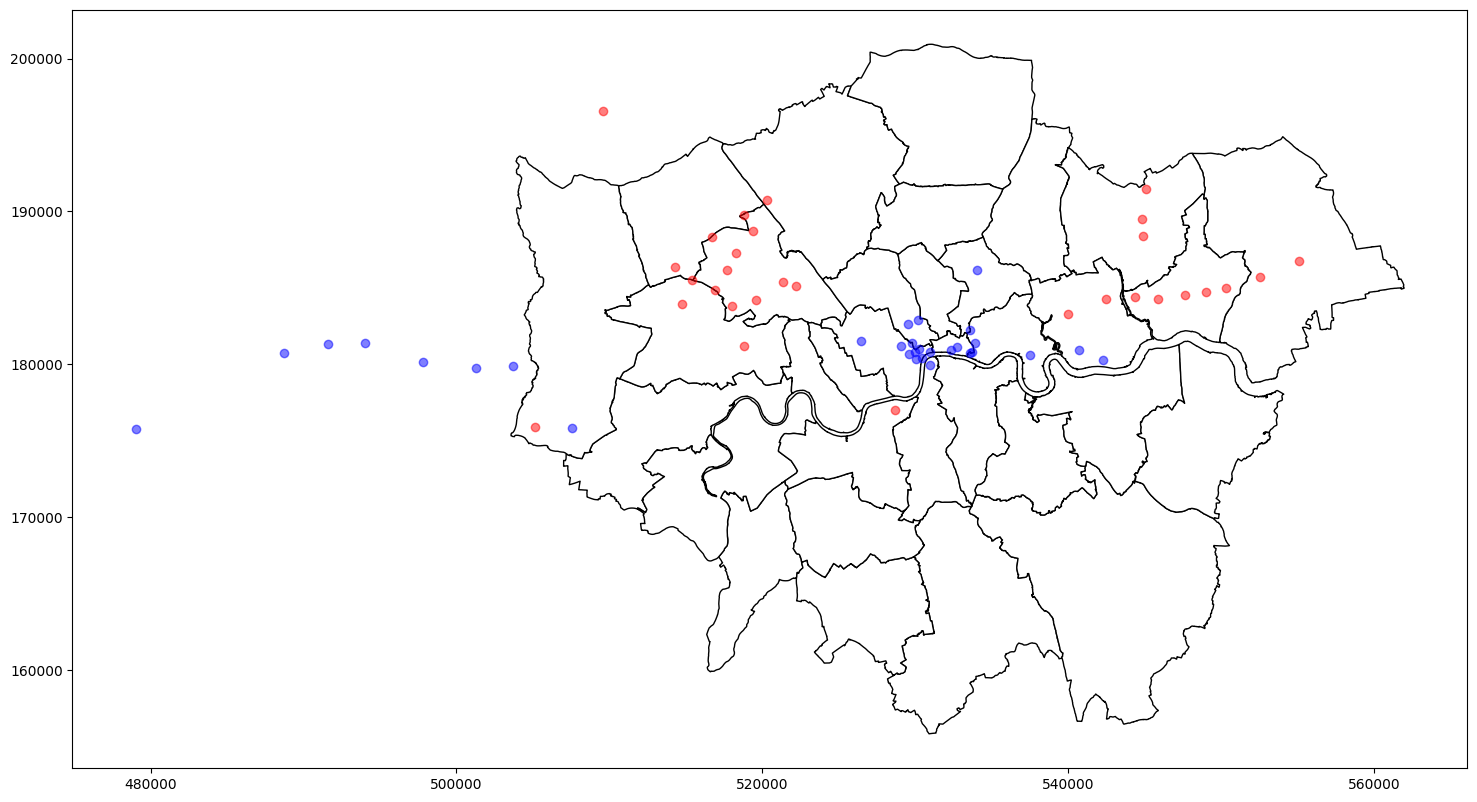

In [259]:
# A plot of the all TfL stations
fig, gax = plt.subplots(figsize=(18, 18))
ldn_df.plot(ax=gax, edgecolor="black", color="white")
gdf_downturn.plot(ax=gax, color='red', alpha = 0.5)
gdf_upturn.plot(ax=gax, color='blue', alpha = 0.5)

##### However, for an interactive and more informative map, I created this plot using Folium and json:

In [260]:
url = (
    "https://raw.githubusercontent.com/Osakwe1/vis/master/tubecreature/data"
)
tfl_network = f"{url}/tfl_lines.json"

map = folium.Map(location=[51.55, -0.25], 
                 tiles="Stamen Terrain", 
                 zoom_start=9.5)

for i,row in gdf_downturn.iterrows():
    #Setup the content of the popup

    iframe = folium.IFrame(f'{str(row["NAME"])} \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Downturn: {str(row["Downturn"])}', 
                           width='100px', 
                           height='150px')

    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='red', icon='')).add_to(map)
    
for i,row in gdf_upturn.iterrows():
    #Setup the content of the popup
    iframe = folium.IFrame(f'{str(row["NAME"])} Station \n Zone: {str(row["Zone"])} \n Lines: {str(row["LINES"])} \n Upturn: {str(row["Upturn"])}',
                          width='100px',
                          height='150px')
    
    #Initialise the popup using the iframe
    popup = folium.Popup(iframe)
        
    #Add each row to the map
    folium.Marker(location=[row['y'],row['x']],
                  popup = popup, icon=folium.Icon(color='blue', icon='')).add_to(map)
    
# # Create a legend using the tube_lines dictionary
# legend_html = """
# <div style="position: fixed; 
#      bottom: 50px; 
#      left: 50px; 
#      width: 160px; 
#      height: 480px; 
#      border: 2px solid grey; 
#      z-index:9999; 
#      font-size:14px;
#      background-color:white;
#      ">
#      &nbsp; TfL Lines <br>
# """

# for line_name, line_info in tube_lines.items():
#     legend_html += f"""
#      &nbsp; <span style="color:{line_info['colour']}; 
#                   font-size: 20px;">&#9679;</span> 
#                   {line_name} <br>
#     """

# legend_html += "</div>"

# map.get_root().html.add_child(folium.Element(legend_html))
    
folium.GeoJson(tfl_network, name="Tube map", style_function=style_function).add_to(map)
folium.GeoJson(ldn_df, name="London Boroughs map", zoom_on_click=False).add_to(map)

folium.LayerControl().add_to(map)
    
map

### Observations 🔎

Looking at the top 30 stations by *Downturn*, we spot a few trends:
- In East London, 9 of the stations of the East section of the District line from Plaistow to Upminister Bridge ranked in the top 30. In that region, near the East section of the Elizabeth line, 13 stations ranked among the 30 stations by Downturn. 

- In West London, across the London Borough of Brent, 11 stations ranked in the top 30. An further 6 stations in close proximity to the area of Brent ranked in the top 30.

- Aside from those two clusters, the only other stations in the top 30 are Heathrow Terminal 5 EL and Battersea Park. Battersea Park is the least used station on the entire network by a large margin, but the recent opening of the Battersea Power station has likely caused a reduction in passenger use. Heathrow Terminal 5 EL's passenger downturn is seemingly unclear, especially as other stations at Heathrow generally saw significant upturn. 

Looking at the top 30 stations by *Upturn*, we spot a few trends:
- On the West section of the Elizabeth line, 7 stations ranked in the top 30. These are stations on the newly opened Western section of the Elizabeth line. 

- Within Central London, 19 stations ranked in the top 30. These are largely stations heavily frequented by tourists (Charing Cross, Oxford Circus, Leicester Square) or are gateway stations (King's Cross, Euston, Paddington).



If you're interested in looking even more detailed maps and data on the TfL network, you can check out [Tubecreature](https://tubecreature.com/) by University College London professor, Oliver O'Brien. 


Thank you for your interest in this project! Check out what I'm working on next on [GitHub](https://github.com/Osakwe1)